## Prevenção do suicídio usando causalidade em aprendizado de máquina
O aumento alarmante do numero de pessoas afetadas por doenças mentais tornou-se um dos principais problemas de saúde pública enfrentado pelos governos em todo o mundo.
O suicídio esta entre as 20 causas de morte mais comuns segundo avaliação da Organização Mundial da Saúde (Organization et al., 2019), superando malaria, câncer de mama
ou homicídio e nos últimos 20 anos, houve um aumento de 24% dos casos.
Utilizamos dados de classificação clínica e identificamos os possíveis fatores causais que possam estabelecer relações com a ideação suicida.
Para tanto, utilizamos métodos de inferência causal e aprendizado de maquina.

Os fatores utilizados para inferência causal foram: Sexo, Estado Civil, Tipo de Residência, Alcoólatra, Droga, Suicídio na Família, Depressão na Família,
Alcoólatra Família, Droga na Família, Neuro, Psiquiátrica, Capaz de desfrutar das coisas, Impacto de sua Família e amigos, Capaz de tomar decisões importantes,
Estudante, Insônia, Ansiedade, Perda de insights, Apetite, Perda de Peso, Ansiedade somática, Hipocondriase, Sentimento de Culpa, Trabalho e interesses,
Energia, Lentidão pensamento e fala, Agitação, Libido, TOC e idade.

Após nossa pesquisa, os fatores que se apresentaram como possíveis causas que levam um indivíduo a ter ideação suicida foram: Suicídio na família, Drogas na família,
Capaz de tomar decisões importantes, Estudante, Hipocondriase, Sentimentos de culpa, Trabalho e interesses e Energia.

O objetivo desse projeto é fazer simulações contrafctuais para obter os possíveis fatores que influenciam determinado indivíduo a ter ideação suicida.
De posse dele, os profissionais da área de saúde que atendem pacientes com ideação suicida, poderão trabalhar com os mesmos de forma mais assertiva objetivando atenuar ou até eliminar
tal ideação.

Passos para execução:
                                                   
1) Preencha a planilha data_base.csv com os dados dos pacientes de acordo com os parâmetros:
   
	  > Suicídio na família: Entre com 1 para Sim e 0 para não.
	     
	  > Capaz de tomar decisões importantes: Entre com um número de 1 a 5, sendo: 1=Concordo totalmente; 2=Concordo; 3=Neutro; 4=Discordo;
		5=Discordo totalmente.
   
	  > Estudante: Entre com 1 para Sim e 0 para não.
   
	  > Hipocondriase: Entre com um número de 0 a 4, sendo: 0=Ausente; 1=Leve 2=Moderado; 3=Moderadamente grave;
		4=Grave.
   
	  > Sentimentos de culpa: Entre com um número de 0 a 4, sendo: 0=Ausente, 1=Duvidoso ou trivial: Autocensura, sente que decepcionou as
		pessoas	2=Leve: Idéias de culpa ou ruminação sobre erros passados ou atos pecaminosos; 3=Moderado: A doença atual é uma punição.
		Delírios de culpa	4=Grave: Ouve vozes acusatórias ou denunciatórias e/ou experimenta alucinações visuais ameaçadoras.
   
	  > Trabalho e interesses: Entre com um número de 0 a 4, sendo:0=Ausente: Sem dificuldade; 1=Duvidoso ou trivial: Pensamentos e
		sentimentos de incapacidade, cansaço ou fraqueza relacionados às atividades; trabalho ou hobbies; 2=Leve: Perda de interesse pela
		atividade; hobbies	ou trabalho – relatados diretamente pelo paciente, ou indiretos em apatia, indecisão e vacilação
		(sente que precisa se esforçar para
		trabalhar ou realizar atividades); 3=Moderado: Diminuição do tempo real gasto nas atividades ou diminuição da produtividade; 4=Grave:
		Deixou de trabalhar por doença atual.
   
	  > Depressão na familia:  Entre com 1 para Sim e 0 para não.
   
      > Histórico de uso de álcool na familia:  Entre com 1 para Sim e 0 para não.
   
      > Capaz de desfrutar das coisas: Entre com um número de 1 a 5, sendo: 1=Concordo totalmente; 2=Concordo; 3=Neutro; 4=Discordo;
		5=Discordo totalmente.

	  > Uso de drogas: Entre com um número de 0 a 2, sendo: 0=Nenhum verificado; 1=Abuso; 2=Dependente.
   
	  > Suicidio: Entre com um número de 0 a 4, sendo: : 0=Ausente; 1=Sente que a vida está vazia; 2=Desejos de morte;
		3=Pensamentos suicidas ativos; 4=Tentativa grave de suicídio.
   
	  > Ansiedade: Entre com um número de 0 a 4, sendo: 0=Ausente: Sem dificuldade 1=Duvidoso ou trivial:
		Tensão subjetiva e irritabilidade;
		2=Leve: Preocupação com assuntos menores; 3=Moderado: Atitude apreensiva aparente na face ou na fala;
		4=Grave: Medos expressos sem questionamento.

2) Faça o upload dos arquivos data.csv e data_base.csv acessando o ícone Arquivos no menu do canto esquerdo, navegando até a pasta que contenha os arquivos. Selecione ambos e clique em abrir ignorando o aviso.

3) Acesse o menu Ambiente de execução/Executar tudo

4) Após alguns minutos será gerado o arquivo data_final com o nível de ideação suicida predito e com os fatores que refletiram alterações no nível de ideação suicida após alguma mudança. Acesse o ícone Arquivos no menu do canto esquerdo, clique com o botão direito no arquivo data_final e selecione Fazer download. O arquivo será salvo na pasta download do seu computador.

Obs: A alteração do valor do nível de ideação suicida em alguma simulação, pode significar que o indíviduo é sensível ao fator da simulação em questão.
O valor da coluna ID da planilha data_final corresponde ao número da linha que determinado indíviduo está localizado no arquivo data_base.


In [1]:
#Importando bibliotecas
import torch
import pandas as pd
import numpy as np

from torch.utils.data import Dataset, DataLoader

import torch.nn as nn

import matplotlib.pyplot as plt

import importlib
if importlib.util.find_spec('ipywidgets') is not None:
    from tqdm.auto import tqdm
else:
    from tqdm import tqdm

from typing import Union
import time
from datetime import timedelta

In [2]:
# Lendo dados

In [3]:
#importando base principal
'''dataframe = pd.read_csv('/content/data.csv', sep=';')

dataframe = dataframe.fillna(-1)#todo -1
df_suic = dataframe.copy()
df_suic = df_suic.astype(float)
df_suic['Estudante'].loc[(df_suic.Estudante==0.5)] =1.0'''

"dataframe = pd.read_csv('/content/data.csv', sep=';')\n\ndataframe = dataframe.fillna(-1)#todo -1\ndf_suic = dataframe.copy()\ndf_suic = df_suic.astype(float)\ndf_suic['Estudante'].loc[(df_suic.Estudante==0.5)] =1.0"

In [2]:
#Liste de features geradas no grafo causal
notears_selected = [
   "Suic_familia",
    "Capaz de tomar decisões importantes",
    "Estudante",
    "Hipocondriase",
    "Sentimentos_culpa",
    "Trabalho e interesses",
    'Dep_familia',
    'Alc_familia',
    'Capaz de desfrutar das coisas',
    'Droga',
    'Suicidio',
    'Ansiedade',
     ]

In [5]:
#df_suic['Id'] = df_suic.index

In [6]:
#df_suic[notears_selected].to_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\df_suic.csv')

In [7]:
#df_suic['Id'] = range(df_novo['Id'].max()+1, (df_suic.shape[0]+df_novo.shape[0])+1) #todo

# Criando conjunto de dados causal

In [3]:
# Conjunto de dados de X
class CausalDataset(Dataset):
    def __init__(self, X, target:Union[list, int]):
        torch.manual_seed(3)
        self.X = torch.tensor(X, dtype=torch.double)
        self.target = target
        if isinstance(target, int):
            self.target = [target]

        # X é toda variável, exceto a lista de targets
        dims = list(range(self.X.shape[1]))
        self.x = self.X[:, [i for i in dims if i not in self.target]]
        self.y = self.X[:, self.target]

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx].double(), self.y[idx].double()

In [4]:
class MLP(torch.nn.Module):
    def __init__(self, dim_list:list, add_dropout:bool=False):
        super(MLP, self).__init__()
        torch.manual_seed(3)
        self.layers = torch.nn.ModuleList()
        for i in range(len(dim_list) - 2):
            self.layers.append(torch.nn.Linear(dim_list[i], dim_list[i+1]))
            self.layers.append(torch.nn.ReLU())
            if add_dropout:
                self.layers.append(torch.nn.Dropout(0.3))

        self.layers.append(torch.nn.Linear(dim_list[-2], dim_list[-1]))
        self.double()

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Pipeline de treino do modelo

In [5]:
def trainPipeline(dataset, model, batch_size=64, train_split=0.8, verbose=True, max_epochs=100, patience=10, lr=0.001, weight_decay=0.0, loss_fn=nn.MSELoss()):
    torch.manual_seed(3)
    train_size = int(train_split * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    criterion = loss_fn
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    patience = patience

    train_losses = []
    test_losses = []
    for epoch in tqdm(range(max_epochs)):
        train_loss = 0
        model.train()
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        test_loss = 0
        model.eval()
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                loss = criterion(output, target)
                test_loss += loss.item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        if verbose:
            print(f"Epoch {epoch} - Train loss: {train_loss} - Test loss: {test_loss}")

        if epoch > 10:
            all_patience = test_losses[-patience:]
            test_loss = test_losses[-1]
            if all([test_loss > x for x in all_patience]):
                print("Early stopping")
                break

    # teste do modelo no conjunto de teste e cálculo da precisão
    model.eval()
    with torch.no_grad():
        y_pred_test = []
        y_true_test = []
        y_pred_train = []
        y_true_train = []

        for data, target in train_loader:
            output = model(data)
            y_pred_train.append(output)
            y_true_train.append(target)
        for data, target in test_loader:
            output = model(data)
            y_pred_test.append(output)
            y_true_test.append(target)

        y_pred_test = torch.cat(y_pred_test, dim=0)
        y_true_test = torch.cat(y_true_test, dim=0)
        y_pred_train = torch.cat(y_pred_train, dim=0)
        y_true_train = torch.cat(y_true_train, dim=0)

        train_error = torch.abs(y_pred_train - y_true_train)
        test_error = torch.abs(y_pred_test - y_true_test)

        # calculando acurácia para cada tárget
        test_accuracy = []
        train_accuracy = []
        for i in range(len(y_true_test[0])):
            test_accuracy.append(torch.sum(test_error[:, i] < 0.5) / len(test_error))
            train_accuracy.append(torch.sum(train_error[:, i] < 0.5) / len(train_error))

        print(f"Final Train accuracy: {train_accuracy}")
        print(f"Final Test accuracy: {test_accuracy}")

    metrics = {
        "train_loss": train_losses,
        "test_loss": test_losses,
        "train_error": train_error,
        "test_error": test_error,
        "test_accuracy": test_accuracy
    }

    return model, metrics

## Agora adicionamos os erros ao conjunto de dados e treinamos o modelo contrafactual

In [6]:
# Criando o modelo counterfactual

class CounterfactualModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CounterfactualModel, self).__init__()
        self.individuality_model = MLP([input_size, hidden_size, hidden_size, hidden_size, 1], add_dropout=True)
        self.counterfactual_model = MLP([input_size+1, hidden_size, hidden_size, hidden_size, output_size], add_dropout=True)

    def individuality(self, x):
        return self.individuality_model(x)

    def counterfactual(self, x, i):
        x = torch.cat([x, i], dim=1)
        return self.counterfactual_model(x)

    def forward(self, x):
        i = self.individuality(x)
        y = self.counterfactual(x, i)
        return y

# Treino do modelo com features selecionadas na inferência causal

In [98]:
## Primeiro treinamos um modelo para cada target e obtemos o valor dos erros (individualidade)

In [583]:
# todo
# from typing import Union
dataframe = pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\final_novo.csv',
                        sep=';') 

dataframe = dataframe.drop(['Chave'], axis=1) 
dataframe = dataframe.fillna(-1)  #todo -1
dataframe['Anos educacao formal'] = dataframe['Anos educacao formal'].replace(-5, -1)
dataframe['sexo'].replace({'M': 0, 'F': 1}, inplace=True)
df_suic = dataframe.copy()
df_suic = df_suic.astype(float)
df_suic.shape


(3953, 68)

  0%|          | 0/300 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.4758)]
Final Test accuracy: [tensor(0.4690)]


  0%|          | 0/300 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.5341)]
Final Test accuracy: [tensor(0.5229)]


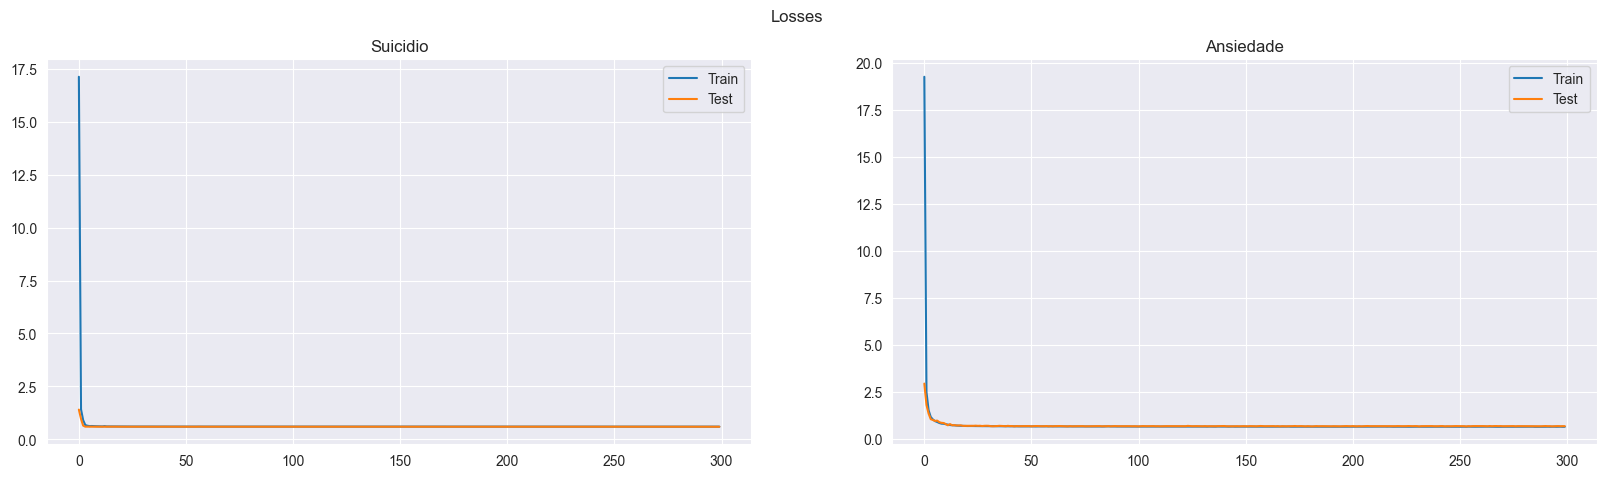

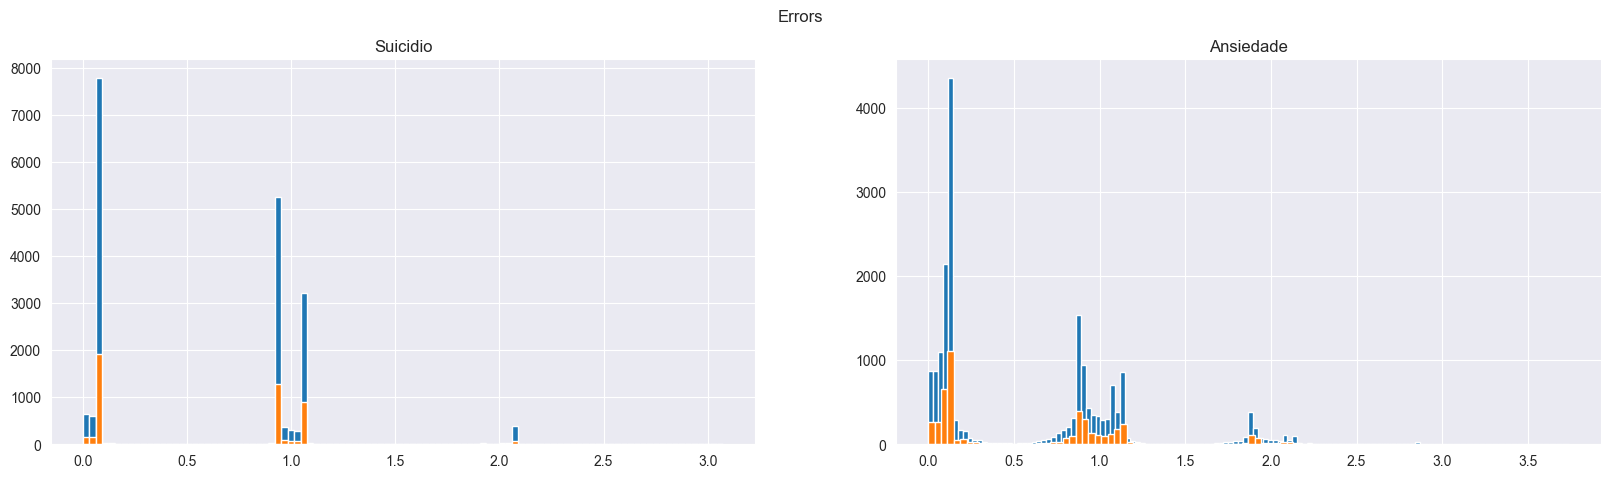

  0%|          | 0/300 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.4758), tensor(0.5331)]
Final Test accuracy: [tensor(0.4690), tensor(0.5220)]


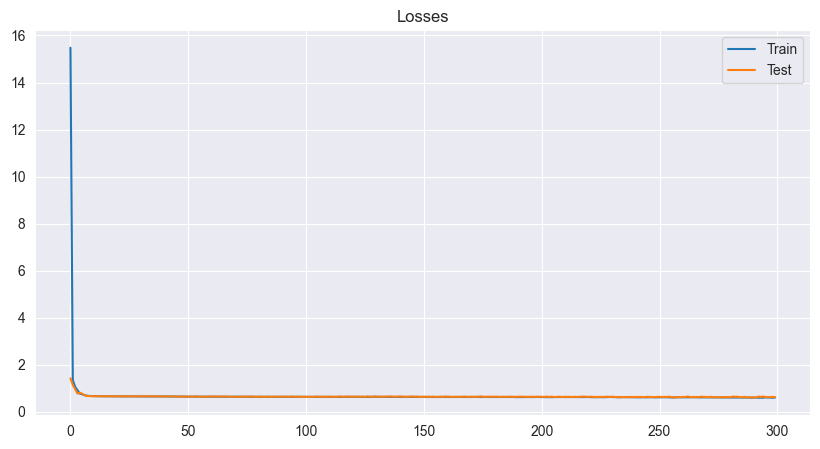

  0%|          | 0/1000 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.4790)]
Final Test accuracy: [tensor(0.4673)]


  0%|          | 0/1000 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.5387)]
Final Test accuracy: [tensor(0.5193)]


In [100]:

#df_suic['Suicidio']=np.where((df_suic['Suicidio'] >1),1,0) #todo
df_suic_notears = df_suic.copy()
df_suic_notears = df_suic_notears[notears_selected]
# calculate errors
suic_erros = []
anx_erros = []
# get the target collumns indexes
targets = ["Suicidio", "Ansiedade"]
targets_idx = [df_suic.columns.get_loc(c) for c in targets]

# Create the dataset
suic_dataset = CausalDataset(df_suic.values, targets_idx[0])
anx_dataset = CausalDataset(df_suic.values, targets_idx[1])
sample_x, sample_y = suic_dataset[0]

# Now we predict the first target with a MLP
suic_model = MLP([sample_x.shape[0], 64, 64, 64, 1], add_dropout=True)
anx_model = MLP([sample_x.shape[0], 64, 64, 64, 1], add_dropout=True)

suic_model, suic_metrics = trainPipeline(suic_dataset, suic_model, verbose=False, max_epochs=300, weight_decay=1e-5)
anx_model, anx_metrics = trainPipeline(anx_dataset, anx_model, verbose=False, max_epochs=300, weight_decay=1e-5)

# plot the losses with subplots todo
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle("Losses")
axs[0].plot(suic_metrics["train_loss"], label="Train")
axs[0].plot(suic_metrics["test_loss"], label="Test")
axs[0].set_title("Suicidio")
axs[0].legend()

axs[1].plot(anx_metrics["train_loss"], label="Train")
axs[1].plot(anx_metrics["test_loss"], label="Test")
axs[1].set_title("Ansiedade")
axs[1].legend()

plt.show()


#  plot errors hist with subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle("Errors")
axs[0].hist(suic_metrics["train_error"][:,0], label="Train", bins=100)
axs[0].hist(suic_metrics["test_error"][:,0], label="Test", bins=100)
axs[0].set_title("Suicidio")

axs[1].hist(anx_metrics["train_error"][:,0], label="Train", bins=100)
axs[1].hist(anx_metrics["test_error"][:,0], label="Test", bins=100)
axs[1].set_title("Ansiedade")

plt.show()
with torch.no_grad():
    for data, y_true in suic_dataset:
        y_pred = suic_model(data)
        error = torch.abs(y_pred - y_true).item()
        suic_erros.append(error)
    for data, y_true in anx_dataset:
        y_pred = anx_model(data)
        error = torch.abs(y_pred - y_true).item()
        anx_erros.append(error)

suic_erros = np.array(suic_erros)
anx_erros = np.array(anx_erros)

# add errors to the dataframe   
df_suic_with_errors = df_suic.copy()
df_suic_with_errors["Suicidio_error"] = suic_erros
df_suic_with_errors["Ansiedade_error"] = anx_erros

# create the causal dataset with the errors
targets_idx = [df_suic_with_errors.columns.get_loc(c) for c in targets]
causal_dataset_error = CausalDataset(df_suic_with_errors.values, targets_idx)
sample_x, sample_y = causal_dataset_error[0]

# create the counterfactual model
cf_model = CounterfactualModel(sample_x.shape[0], 64, sample_y.shape[0])

# train the counterfactual model
cf_model, cf_metrics = trainPipeline(causal_dataset_error, cf_model, verbose=False, max_epochs=300, weight_decay=1e-5)

# plot the losses 
plt.figure(figsize=(10, 5))
plt.plot(cf_metrics["train_loss"], label="Train")
plt.plot(cf_metrics["test_loss"], label="Test")
plt.title("Losses")
plt.legend()
plt.show()
# Criando modelos para cada target
targets = ["Suicidio", "Ansiedade"]
targets_idx = [df_suic_notears.columns.get_loc(c) for c in targets]

# Criando base de dados
notears_suic_dataset = CausalDataset(df_suic_notears.values, targets_idx[0])
notears_anx_dataset = CausalDataset(df_suic_notears.values, targets_idx[1])
sample_x, sample_y = notears_suic_dataset[0]

# Agora prevemos os alvos com um MLP (Perceptron multicamadas)
suic_causal_model = MLP([sample_x.shape[0], 64, 64, 64, 1], add_dropout=True)
anx_causal_model = MLP([sample_x.shape[0], 64, 64, 64, 1], add_dropout=True)

suic_causal_model, suic_causal_metrics = trainPipeline(notears_suic_dataset, suic_causal_model, verbose=False, max_epochs=1000, weight_decay=1e-5)
anx_causal_model, anx_causal_metrics = trainPipeline(notears_anx_dataset, anx_causal_model, verbose=False, max_epochs=1000, weight_decay=1e-5)


In [101]:
# calculando individualidade
#todo 
suic_causal_erros = []
anx_causal_erros = []
with torch.no_grad():
    for data, y_true in notears_suic_dataset:
        y_pred = suic_causal_model(data)
        error = torch.abs(y_pred - y_true).item()
        suic_causal_erros.append(error)
    for data, y_true in notears_anx_dataset:
        y_pred = anx_causal_model(data)
        error = torch.abs(y_pred - y_true).item()
        anx_causal_erros.append(error)

suic_causal_erros = np.array(suic_causal_erros)
anx_causal_erros = np.array(anx_causal_erros)

# adicionando individualidade no dataframe
df_suic_notears_with_errors = df_suic_notears.copy()
df_suic_notears_with_errors["Suicidio_error"] = suic_causal_erros
df_suic_notears_with_errors["Ansiedade_error"] = anx_causal_erros

# criando dataset causal com individualidade
targets_idx = [df_suic_notears_with_errors.columns.get_loc(c) for c in targets]
notears_causal_dataset_error = CausalDataset(df_suic_notears_with_errors.values, targets_idx)
sample_x, sample_y = notears_causal_dataset_error[0]

# criando modelo counterfactual
causal_cf_model = CounterfactualModel(sample_x.shape[0], 64, sample_y.shape[0])

# treinando modelo counterfactual
causal_cf_model, causal_cf_metrics = trainPipeline(notears_causal_dataset_error, causal_cf_model, verbose=False, max_epochs=1000, weight_decay=1e-5)
counterfact=causal_cf_model
df_suic=df_suic_notears_with_errors.copy()

  0%|          | 0/1000 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.8736), tensor(0.8653)]
Final Test accuracy: [tensor(0.8566), tensor(0.8474)]


In [102]:
#torch.save(causal_cf_model, "cf_models/causal_cf_model_2300.pt")

In [32]:
notears_selected = [
   "Suic_familia",
    "Capaz de tomar decisões importantes",
    "Estudante",
    "Hipocondriase",
    "Sentimentos_culpa",
    "Trabalho e interesses",
    'Dep_familia',
    'Alc_familia',
    'Capaz de desfrutar das coisas',
    'Droga',  
    'Suicidio',
    'Ansiedade',
'Suicidio_error', 'Ansiedade_error'    
     ]

In [13]:
#todo
counterfact=torch.load("C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\\notebooks\cf_models\causal_cf_model_2300.pt")
#ausal_cf_model

In [9]:
#todo
df_suic = pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\\notebooks\cf_models\df_suic_notears_with_errors.csv', sep=',')
#df_suic_notears_with_errors

In [10]:
df_suic=df_suic[notears_selected].copy()

In [16]:
#df_suic.to_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\\notebooks\cf_models\df_s.csv', sep=',')

In [17]:
duplicadas = df_suic.duplicated()

In [144]:
df_suic[df_suic.duplicated(keep = 'last')]

,Suic_familia,Capaz de tomar decisões importantes,Estudante,Hipocondriase,Sentimentos_culpa,Trabalho e interesses,Dep_familia,Alc_familia,Capaz de desfrutar das coisas,Droga,Suicidio,Ansiedade,Suicidio_error,Ansiedade_error
0,1.0,2.0,0.0,2.0,3.0,2.0,1.0,1.0,2.0,0.0,2.0,2.0,1.110597,0.168239
1,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.110597,0.168239
6,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,2.0,0.889403,0.168239
8,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.889403,1.168239
16,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,3.0,0.889403,0.831761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,1.0,1.0,0.0,1.0,3.0,3.0,1.0,1.0,1.0,0.0,1.0,2.0,0.110597,0.168239
3752,1.0,2.0,0.0,1.0,3.0,3.0,1.0,1.0,2.0,0.0,1.0,2.0,0.110597,0.168239
3775,1.0,1.0,0.0,0.0,2.0,3.0,1.0,1.0,1.0,0.0,1.0,2.0,0.110597,0.168239
3837,1.0,1.0,0.0,0.0,2.0,3.0,1.0,1.0,1.0,0.0,1.0,2.0,0.110597,0.168239


In [145]:
duplicadas.unique()

array([False,  True])

In [7]:
targets = ["Suicidio", "Ansiedade"]


In [112]:
#df.drop(columns=['Ansiedade'],inplace=True)

In [38]:
# Função para gerar contrafactuais
def contrafact_dp(df, coluna, i):
    df_1 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor','Valor_new'])
    dataset = CausalDataset(df.values, [df.columns.get_loc(c) for c in targets])        
        
    cf_idx = i
     
    # predict the counterfactuals
    with torch.no_grad():            
        for data, y_true in dataset:
            data = data.unsqueeze(0)                
            i = counterfact.individuality(data)                
            
            cf = counterfact.counterfactual(data, i)
            cf = cf.squeeze(0).round().numpy().tolist()
            suic = cf[0]    
            if suic != df["Suicidio"][cf_idx]:
                df1_tmp = pd.DataFrame({'Id' : [cf_idx], 'Feature' : [coluna], 'Suicidio' : [df["Suicidio"][cf_idx]], 'Suicidio_new' : [suic], 'Valor' : [np.nan], 'Valor_new' : [np.nan]})
                df_1 = pd.concat([df_1, df1_tmp])                   
   
    return df_1

In [75]:
df_suic.Suicidio.unique()

array([ 2.,  1.,  0.,  3.,  4., -1.])

In [156]:
'''feature_ranges_map = {    
    'Capaz de tomar decisões importantes': [1, 2, 3, 4, 5],
    'Estudante': [0, 1],
    'Hipocondriase': [0, 1, 2, 3, 4],
    'Sentimentos_culpa': [0, 1, 2, 3, 4],
    'Trabalho e interesses': [0, 1, 2, 3, 4],
    'Dep_familia': [0, 1],
    'Alc_familia': [0, 1],
    'Capaz de desfrutar das coisas': [1, 2, 3, 4, 5],
    'Droga': [0, 1, 2],
    'Suic_familia': [0, 1]
}

# Dicionário para rastrear reduções de ideação suicida por ID
reduced_ideation_map = {}

# Função para calcular a função de energia (custo) para o Simulated Annealing
def energy_function(counterfactual, original_data, suicidio_value, id_value):
    # Convertendo para arrays
    counterfactual_array = np.array([counterfactual[feature] for feature in counterfactual])
    original_array = np.array(original_data)

    # Cálculo da diferença
    difference = np.sum((counterfactual_array - original_array) ** 2)

    # Penaliza apenas se Suic_familia for alterado e o Id já tiver redução
    if (
        id_value in reduced_ideation_map
        and reduced_ideation_map[id_value] != set()
        and counterfactual['Suic_familia'].iloc[0] != original_data['Suic_familia'].iloc[0]
    ):
        difference += 1000  # Penalidade maior para Suic_familia

    return difference + suicidio_value

# Função Simulated Annealing para otimizar o contrafactual
def simulated_annealing(data, c, index, max_iter=4, temp=1.0, cooling_rate=0.99):
    current_data = data.copy()
    df_1, df_2 = pd.DataFrame(), pd.DataFrame()
    best_energy = float('inf')
    used_values = set()
    new_value = -1
    temp *= cooling_rate
    current_value = current_data.loc[current_data.index[0], c]  # Valor original

    for i in range(max_iter):
        # Gera os valores possíveis para a feature c que ainda não foram usados        
        possible_values = list(set(feature_ranges_map[c]) - used_values - {current_value})
        
        if not possible_values:  # Se não há mais valores disponíveis, interrompe o loop
            break
        new_value = float(np.random.choice(possible_values))            
        used_values.add(new_value)
           
        if current_value != new_value:  # Se houve alteração no valor         
            # Atualiza o dado com o novo valor
            current_data.loc[current_data.index[0], c] = new_value
            
            # Avalia a mudança com contrafact_dp
            df_1_tmp, df_2_tmp = contrafact_dp(current_data, c, index)
                                
            if not df_1_tmp.empty:  # Verifica se df_1_tmp não está vazio               
                counterfactual = data.copy()
                counterfactual[c] = new_value
                counterfactual['Suicidio'] = df_1_tmp['Suicidio_new'].values[0]
                suicidio_value = df_1_tmp['Suicidio'].values[0]
                new_suicidio_value = df_1_tmp['Suicidio_new'].values[0]
                
                # Atualiza o mapa de reduções
                if new_suicidio_value < suicidio_value :# todo and c != "Suic_familia":
                    if index not in reduced_ideation_map:
                        reduced_ideation_map[index] = set()
                    reduced_ideation_map[index].add(c)

                # Calcula a energia considerando o Id
                new_energy = energy_function(counterfactual, current_data, suicidio_value, index)
                
                # Aceita a nova solução se ela for melhor
                if new_energy < best_energy or (suicidio_value < new_suicidio_value and np.random.rand() < np.exp(-(new_energy - best_energy) / temp)):
                    best_energy = new_energy
                    df_1, df_2 = df_1_tmp, df_2_tmp                            
        
            temp *= cooling_rate  # Resfria a temperatura a cada iteração
            
            # Restaura o valor original se a nova solução não for aceita
            current_data.loc[current_data.index[0], c] = current_value

    return df_1, df_2, new_value


# Função principal
def contr_dp(data, df_sim, df_nao, max_iter=30000):
    """Executa Simulated Annealing escolhendo IDs aleatórios e otimizando todas as features desse ID"""

    # Criando um dicionário de pesos baseado nos valores de 'Suicidio'
    weights_dict = {id_: 2 if data.at[id_, "Suicidio"] >= 2 else 1 for id_ in data.index.unique()}

    # Convertendo para arrays mantendo a ordem correta
    id_list = np.array(list(weights_dict.keys()))
    weights = np.array([weights_dict[id_] for id_ in id_list], dtype=float)
    weights /= weights.sum()  # Normaliza os pesos para garantir soma = 1

    for _ in range(max_iter):
        if not len(id_list):  # Se não há mais IDs, parar
            break

        # Escolhe um ID aleatório considerando os pesos
        random_id = np.random.choice(id_list, p=weights)
        current_data = data.loc[[random_id]].copy()  # Copia os dados do ID selecionado

        for c in features:  # Mantendo a ordem fixa das features
            if c == "Suic_familia" and random_id in reduced_ideation_map and reduced_ideation_map[random_id]:
                continue  # Pula Suic_familia se outra feature já reduziu a ideação
                
            df_1_tmp, df_2_tmp, new_value = simulated_annealing(current_data, c, random_id)
            val = current_data.loc[random_id, c]
            
            # Verifica se a linha já existe antes de concatenar
            if not df_1_tmp.empty:
                mask = (
                    (df_sim['Id'] == random_id) &
                    (df_sim['Feature'] == c) &
                    (df_sim['Valor'] == val) &
                    (df_sim['Valor_new'] == new_value)
                )
                
                # Adiciona apenas se não existir no dataframe
                if not df_sim[mask].any().any():
                    df_sim = pd.concat([df_sim, df_1_tmp], ignore_index=True)
            
            if not df_2_tmp.empty:
                mask = (
                    (df_nao['Id'] == random_id) &
                    (df_nao['Feature'] == c) &
                    (df_nao['Valor'] == val) &
                    (df_nao['Valor_new'] == new_value)
                )
            
                if not df_nao[mask].any().any():
                    df_nao = pd.concat([df_nao, df_2_tmp], ignore_index=True)

    return df_sim, df_nao

# Reordenação das features
features = ["Capaz de tomar decisões importantes", "Estudante", "Hipocondriase",
            "Sentimentos_culpa", "Trabalho e interesses", "Dep_familia", "Alc_familia",
            "Capaz de desfrutar das coisas", "Droga", "Suic_familia"]

targets = ["Suicidio", "Ansiedade"]

df_sim = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])
df_nao = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])'''

In [523]:
'''feature_ranges_map = {    
    'Capaz de tomar decisões importantes': [1, 2, 3, 4, 5],
    'Estudante': [0, 1],
    'Hipocondriase': [0, 1, 2, 3, 4],
    'Sentimentos_culpa': [0, 1, 2, 3, 4],
    'Trabalho e interesses': [0, 1, 2, 3, 4],
    'Dep_familia': [0, 1],
    'Alc_familia': [0, 1],
    'Capaz de desfrutar das coisas': [1, 2, 3, 4, 5],
    'Droga': [0, 1, 2],
    'Suic_familia': [0, 1]
}

# Dicionário para rastrear reduções de ideação suicida por ID
reduced_ideation_map = {}

# Função para calcular a função de energia (custo) para o Simulated Annealing
def energy_function(counterfactual, original_data, suicidio_value, id_value):
    """
    Calcula a função de energia (custo) para o Simulated Annealing.    
    Parâmetros:
    - counterfactual: DataFrame com os valores contrafactuais.
    - original_data: DataFrame com os dados originais, incluindo todas as linhas.
    - suicidio_value: Valor original de ideação suicida.
    - id_value: ID específico sendo analisado.
    
    Retorna:
    - Energia calculada 
    """
    # Extraindo apenas os dados da linha específica do ID
    original_array = np.array(original_data.loc[id_value])  # Garante o uso apenas da linha correta
    
    # Garante que o counterfactual tenha a mesma forma
    counterfactual_array = np.array([counterfactual[feature] for feature in original_data.columns])
    
    # Cálculo da diferença
    difference = np.sum((counterfactual_array - original_array) ** 2)  

    return difference + suicidio_value

# Função Simulated Annealing para otimizar o contrafactual
def simulated_annealing(data, df_sim, df_nao, max_iter=1000000, temp=1.0, cooling_rate=0.99):    
    df_1 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor','Valor_new'])
    df_2 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor','Valor_new'])
    best_energy = float('inf')
    temp *= cooling_rate
       
    stagnation_limit = 10000  # Limite de iterações sem melhorias
    stagnation_counter = 0
    
    # Criando um dicionário de pesos baseado nos valores de 'Suicidio'    
    #weights_dict = {id_: abs(data.at[id_, "Suicidio"]) for id_ in data.index.unique()} 
    #weights_dict = {id_: 2 if data.at[id_, "Suicidio"] >= 2 else 1 for id_ in data.index.unique()}
    weights_dict = {
    id_: 0.5 if data.at[id_, "Suicidio"] == 0 
    else 1 if data.at[id_, "Suicidio"] == 1 
    else 2 
    for id_ in data.index.unique()
    }

    # Converter para arrays mantendo a ordem correta
    id_list = np.array(list(weights_dict.keys()))
    weights = np.array([weights_dict[id_] for id_ in id_list], dtype=float)
    weights /= weights.sum()  # Normaliza os pesos
    
    # Adicionando a coluna com os valores originais das features
    features = list(feature_ranges_map.keys())  # Obtemos todas as features do mapa
    for c in features:
        data[f'{c}_original'] = data[c].copy()  # Cria uma coluna de valores originais para cada feature

    for i in range(max_iter):
        # Escolhe um ID aleatório considerando os pesos
        random_id = np.random.choice(id_list, p=weights)  # TODO 
        current_data = data.loc[[random_id]].copy()  # Copia os dados do ID selecionado
        
        c = np.random.choice(features) # Escolhe uma feature aleatória da lista de features
        
        original_value = current_data.loc[random_id, f'{c}_original'] # Agora o valor original da feature c será lido da coluna nova

        # Gera os valores possíveis para a feature c   
        new_value = np.random.choice([v for v in feature_ranges_map[c] if v != original_value]) # Garante que o valor original não seja escolhido
        
        if original_value != new_value:  # Se houve alteração no valor     
            current_data.loc[random_id, c] = new_value # Atualiza o dado com o novo valor            
                      
            df_1_tmp, df_2_tmp = contrafact_dp(current_data[notears_selected], c, random_id)  # Avalia a mudança com contrafact_dp 
            
            if not df_1_tmp.empty:  # Verifica se df_1_tmp não está vazio             
                counterfactual = current_data.copy()
                counterfactual[c] = new_value
                counterfactual['Suicidio'] = df_1_tmp['Suicidio_new'].values[0]
                suicidio_value = df_1_tmp['Suicidio'].values[0]
                new_suicidio_value = df_1_tmp['Suicidio_new'].values[0]
                
                new_energy = energy_function(       # Calcula a energia considerando o Id
                    counterfactual=counterfactual, 
                    original_data=data,             # Passa o dataframe completo
                    suicidio_value=suicidio_value, 
                    id_value=random_id)
                
                if c == 'Suic_familia': # Aplica a penalização para Suic_familia todo Dany faz sentido?
                    new_energy +=100
                    
                # Aceita a nova solução se ela for melhor
                #if new_energy < best_energy or (suicidio_value < new_suicidio_value and np.random.rand() < np.exp(-(new_energy - best_energy) / temp * 10 )):
                if new_energy < best_energy or np.random.rand() < np.exp(-(new_energy - best_energy) / (temp * 10)):

                    best_energy = new_energy
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor'].isna()), 'Valor'] = original_value  # Usa o valor original aqui
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor_new'].isna()), 'Valor_new'] = new_value
                                         
                    mask_df_1 = pd.DataFrame({
                        'Id': [random_id],
                        'Feature': [c],
                        'Valor': [original_value],
                        'Valor_new': [new_value]
                    })
                    
                    mask_df_2 = pd.DataFrame({
                        'Id': [random_id],
                        'Feature': [c],
                        'Valor': [original_value],
                        'Valor_new': [new_value]
                    })                                        
                    
                    if not df_1_tmp.empty: # Adiciona apenas se não existir no DataFrame
                        if not ((df_1[['Id', 'Feature', 'Valor', 'Valor_new']] == mask_df_1.values).all(axis=1)).any():
                            df_1 = pd.concat([df_1, df_1_tmp], ignore_index=True)
                    
                    if not df_2_tmp.empty:
                        if not ((df_2[['Id', 'Feature', 'Valor', 'Valor_new']] == mask_df_2.values).all(axis=1)).any():
                            df_2 = pd.concat([df_2, df_2_tmp], ignore_index=True)      
                    
                    stagnation_counter = 0  # Reseta o contador de estagnação
                
                else: stagnation_counter += 1  # Incrementa o contador se não houve melhora  
                
                if c == 'Suic_familia':
                    new_energy -=100 # Remove a penalização após a avaliação                  
            
            #temp = temp - (cooling_rate * temp)  # cooling_rate deve ser um valor pequeno, ex: 0.00001
                      
            temp = temp / np.log(i + 1) # Resfriamento log #temp *= cooling_rate  # Resfria a temperatura a cada iteração 
            #temp = temp / (1 + 0.001 * i)  
                # Critério de parada baseado na estagnação
            if stagnation_counter >= stagnation_limit:
                print(f"Parando o algoritmo após {i} iterações devido à estagnação.")
                break

    return df_1, df_2

# Função para gerar contrafactuais
def contrafact_dp(df, coluna, i):
    df_1 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor','Valor_new'])
    df_2 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor','Valor_new'])
    dataset = CausalDataset(df.values, [df.columns.get_loc(c) for c in targets])        
        
    cf_idx = i
     
    # predict the counterfactuals
    with torch.no_grad():            
        for data, y_true in dataset:
            data = data.unsqueeze(0)                
            i = counterfact.individuality(data)                
            
            cf = counterfact.counterfactual(data, i)
            cf = cf.squeeze(0).round().numpy().tolist()
            suic = cf[0]    
            if suic != df["Suicidio"][cf_idx]:
                df1_tmp = pd.DataFrame({'Id' : [cf_idx], 'Feature' : [coluna], 'Suicidio' : [df["Suicidio"][cf_idx]], 'Suicidio_new' : [suic], 'Valor' : [np.nan], 'Valor_new' : [np.nan]})
                df_1 = pd.concat([df_1, df1_tmp])                   
            else:
                df_2_tmp = pd.DataFrame({'Id' : [cf_idx], 'Feature' : [coluna], 'Suicidio' : [df["Suicidio"][cf_idx]], 'Suicidio_new' : [suic], 'Valor' : [np.nan], 'Valor_new' : [np.nan]})
                df_2 = pd.concat([df_2, df_2_tmp])
   
    return df_1, df_2

# Reordenação das features
features = ["Capaz de tomar decisões importantes", "Estudante", "Hipocondriase",
            "Sentimentos_culpa", "Trabalho e interesses", "Dep_familia", "Alc_familia",
            "Capaz de desfrutar das coisas", "Droga", "Suic_familia"]

targets = ["Suicidio", "Ansiedade"]

df_sim = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])
df_nao = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])'''
#df_sim, df_nao = contr_dp(df_suic, df_sim, df_nao)

In [507]:
''' todo melhor versão 09/03
feature_ranges_map = {    
    'Capaz de tomar decisões importantes': [1, 2, 3, 4, 5],
    'Estudante': [0, 1],
    'Hipocondriase': [0, 1, 2, 3, 4],
    'Sentimentos_culpa': [0, 1, 2, 3, 4],
    'Trabalho e interesses': [0, 1, 2, 3, 4],
    'Dep_familia': [0, 1],
    'Alc_familia': [0, 1],
    'Capaz de desfrutar das coisas': [1, 2, 3, 4, 5],
    'Droga': [0, 1, 2],
    'Suic_familia': [0, 1]
}

# Dicionário para rastrear reduções de ideação suicida por ID
reduced_ideation_map = {}

# Função para calcular a função de energia (custo) para o Simulated Annealing
def energy_function(counterfactual, original_data, suicidio_value, id_value):
    """
    Calcula a função de energia (custo) para o Simulated Annealing.    
    Parâmetros:
    - counterfactual: DataFrame com os valores contrafactuais.
    - original_data: DataFrame com os dados originais, incluindo todas as linhas.
    - suicidio_value: Valor original de ideação suicida.
    - id_value: ID específico sendo analisado.
    
    Retorna:
    - Energia calculada 
    """
    # Extraindo apenas os dados da linha específica do ID
    original_array = np.array(original_data.loc[id_value])  # Garante o uso apenas da linha correta
    
    # Garante que o counterfactual tenha a mesma forma
    counterfactual_array = np.array([counterfactual[feature] for feature in original_data.columns])
    
    # Cálculo da diferença
    difference = np.sum((counterfactual_array - original_array) ** 2)  

    return difference + suicidio_value

# Função Simulated Annealing para otimizar o contrafactual
def simulated_annealing(data, df_sim, df_nao, max_iter=1000000, temp=1.0, cooling_rate=0.99):    
    df_1 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor','Valor_new'])
    df_2 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor','Valor_new'])
    best_energy = float('inf')
    temp *= cooling_rate
    
    # Criando um dicionário de pesos baseado nos valores de 'Suicidio'    
    #weights_dict = {id_: abs(data.at[id_, "Suicidio"]) for id_ in data.index.unique()} 
    #weights_dict = {id_: 2 if data.at[id_, "Suicidio"] >= 2 else 1 for id_ in data.index.unique()}
    weights_dict = {
    id_: 0.5 if data.at[id_, "Suicidio"] == 0 
    else 1 if data.at[id_, "Suicidio"] == 1 
    else 2 
    for id_ in data.index.unique()
    }

    # Converter para arrays mantendo a ordem correta
    id_list = np.array(list(weights_dict.keys()))
    weights = np.array([weights_dict[id_] for id_ in id_list], dtype=float)
    weights /= weights.sum()  # Normaliza os pesos
    
    # Adicionando a coluna com os valores originais das features
    features = list(feature_ranges_map.keys())  # Obtemos todas as features do mapa
    for c in features:
        data[f'{c}_original'] = data[c].copy()  # Cria uma coluna de valores originais para cada feature

    for i in range(max_iter):
        # Escolhe um ID aleatório considerando os pesos
        random_id = np.random.choice(id_list, p=weights)  # TODO 
        current_data = data.loc[[random_id]].copy()  # Copia os dados do ID selecionado
        
        c = np.random.choice(features) # Escolhe uma feature aleatória da lista de features
        
        original_value = current_data.loc[random_id, f'{c}_original'] # Agora o valor original da feature c será lido da coluna nova

        # Gera os valores possíveis para a feature c   
        new_value = np.random.choice([v for v in feature_ranges_map[c] if v != original_value]) # Garante que o valor original não seja escolhido
        
        if original_value != new_value:  # Se houve alteração no valor     
            current_data.loc[random_id, c] = new_value # Atualiza o dado com o novo valor            
                      
            df_1_tmp, df_2_tmp = contrafact_dp(current_data[notears_selected], c, random_id)  # Avalia a mudança com contrafact_dp 
            
            if not df_1_tmp.empty:  # Verifica se df_1_tmp não está vazio             
                counterfactual = current_data.copy()
                counterfactual[c] = new_value
                counterfactual['Suicidio'] = df_1_tmp['Suicidio_new'].values[0]
                suicidio_value = df_1_tmp['Suicidio'].values[0]
                new_suicidio_value = df_1_tmp['Suicidio_new'].values[0]
                
                new_energy = energy_function(       # Calcula a energia considerando o Id
                    counterfactual=counterfactual, 
                    original_data=data,             # Passa o dataframe completo
                    suicidio_value=suicidio_value, 
                    id_value=random_id)
                
                if c == 'Suic_familia': # Aplica a penalização para Suic_familia todo Dany faz sentido?
                    new_energy +=100
                    
                # Aceita a nova solução se ela for melhor
                #if new_energy < best_energy or (suicidio_value < new_suicidio_value and np.random.rand() < np.exp(-(new_energy - best_energy) / temp)):
                if new_energy < best_energy or np.random.rand() < np.exp(-(new_energy - best_energy) / (temp * 10)):

                    best_energy = new_energy
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor'].isna()), 'Valor'] = original_value  # Usa o valor original aqui
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor_new'].isna()), 'Valor_new'] = new_value
                                         
                    mask_df_1 = pd.DataFrame({
                        'Id': [random_id],
                        'Feature': [c],
                        'Valor': [original_value],
                        'Valor_new': [new_value]
                    })
                    
                    mask_df_2 = pd.DataFrame({
                        'Id': [random_id],
                        'Feature': [c],
                        'Valor': [original_value],
                        'Valor_new': [new_value]
                    })                                        
                    
                    if not df_1_tmp.empty: # Adiciona apenas se não existir no DataFrame
                        if not ((df_1[['Id', 'Feature', 'Valor', 'Valor_new']] == mask_df_1.values).all(axis=1)).any():
                            df_1 = pd.concat([df_1, df_1_tmp], ignore_index=True)
                    
                    if not df_2_tmp.empty:
                        if not ((df_2[['Id', 'Feature', 'Valor', 'Valor_new']] == mask_df_2.values).all(axis=1)).any():
                            df_2 = pd.concat([df_2, df_2_tmp], ignore_index=True)          
                  
                if c == 'Suic_familia':
                    new_energy -=100 # Remove a penalização após a avaliação                  
            
            #temp = temp - (cooling_rate * temp)  # cooling_rate deve ser um valor pequeno, ex: 0.00001
                      
            temp = temp / np.log(i + 1) # Resfriamento log #temp *= cooling_rate  # Resfria a temperatura a cada iteração 
            #temp = temp / (1 + 0.001 * i)  

    return df_1, df_2

# Função para gerar contrafactuais
def contrafact_dp(df, coluna, i):
    df_1 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor','Valor_new'])
    df_2 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor','Valor_new'])
    dataset = CausalDataset(df.values, [df.columns.get_loc(c) for c in targets])        
        
    cf_idx = i
     
    # predict the counterfactuals
    with torch.no_grad():            
        for data, y_true in dataset:
            data = data.unsqueeze(0)                
            i = counterfact.individuality(data)                
            
            cf = counterfact.counterfactual(data, i)
            cf = cf.squeeze(0).round().numpy().tolist()
            suic = cf[0]    
            if suic != df["Suicidio"][cf_idx]:
                df1_tmp = pd.DataFrame({'Id' : [cf_idx], 'Feature' : [coluna], 'Suicidio' : [df["Suicidio"][cf_idx]], 'Suicidio_new' : [suic], 'Valor' : [np.nan], 'Valor_new' : [np.nan]})
                df_1 = pd.concat([df_1, df1_tmp])                   
            else:
                df_2_tmp = pd.DataFrame({'Id' : [cf_idx], 'Feature' : [coluna], 'Suicidio' : [df["Suicidio"][cf_idx]], 'Suicidio_new' : [suic], 'Valor' : [np.nan], 'Valor_new' : [np.nan]})
                df_2 = pd.concat([df_2, df_2_tmp])
   
    return df_1, df_2

# Reordenação das features
features = ["Capaz de tomar decisões importantes", "Estudante", "Hipocondriase",
            "Sentimentos_culpa", "Trabalho e interesses", "Dep_familia", "Alc_familia",
            "Capaz de desfrutar das coisas", "Droga", "Suic_familia"]

targets = ["Suicidio", "Ansiedade"]

df_sim = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])
df_nao = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])'''
#df_sim, df_nao = contr_dp(df_suic, df_sim, df_nao)

In [795]:
#todo sugestões Dany
'''feature_ranges_map = {    
    'Capaz de tomar decisões importantes': [1, 2, 3, 4, 5],
    'Estudante': [0, 1],
    'Hipocondriase': [0, 1, 2, 3, 4],
    'Sentimentos_culpa': [0, 1, 2, 3, 4],
    'Trabalho e interesses': [0, 1, 2, 3, 4],
    'Dep_familia': [0, 1],
    'Alc_familia': [0, 1],
    'Capaz de desfrutar das coisas': [1, 2, 3, 4, 5],
    'Droga': [0, 1, 2],
    'Suic_familia': [0, 1]
}

features = ["Capaz de tomar decisões importantes", "Estudante", "Hipocondriase",
            "Sentimentos_culpa", "Trabalho e interesses", "Dep_familia", "Alc_familia",
            "Capaz de desfrutar das coisas", "Droga", "Suic_familia"]

# Dicionário para rastrear reduções de ideação suicida por ID
reduced_ideation_map = {}

# Função para calcular a função de energia (custo) para o Simulated Annealing
def energy_function(counterfactual, original_data, suicidio_value, id_value):
    """
    Calcula a função de energia (custo) para o Simulated Annealing.
    
    Parâmetros:
    - counterfactual: Dicionário ou DataFrame com os valores contrafactuais.
    - original_data: DataFrame com os dados originais, incluindo todas as linhas.
    - suicidio_value: Valor original de ideação suicida.
    - id_value: ID específico sendo analisado.
    
    Retorna:
    - Energia calculada.
    """
    # Extraindo os dados originais da linha específica
    original_array = original_data.loc[id_value].values    

    # Assegura que o counterfactual esteja na mesma ordem das colunas originais
    counterfactual_array = np.array([counterfactual.get(feature, original_array[i]) 
                                     for i, feature in enumerate(original_data.columns)])
    
    # Cálculo da diferença (MSE) + suicidio_value para reduzir ideação suicida
    difference = np.sum((counterfactual_array - original_array) ** 2)
    
    # Retorna a energia total
    return difference + suicidio_value * 0.1


# Função Simulated Annealing para otimizar o contrafactual
def simulated_annealing(data, max_iter=1000, temp=1.0, cooling_rate=0.99):    
    df_1 = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])
    best_energy = float('inf')
    temp *= cooling_rate

    weights_dict = {
        id_: 0.5 if data.at[id_, "Suicidio"] == 0 
        else 1 if data.at[id_, "Suicidio"] == 1 
        else 2 
        for id_ in data.index.unique()
    }

    id_list = np.array(list(weights_dict.keys()))
    weights = np.array([weights_dict[id_] for id_ in id_list], dtype=float)
    weights /= weights.sum()

    features = list(feature_ranges_map.keys())
    feature_values_map = {c: list(feature_ranges_map[c]) for c in features}

    for c in features:
        data[f'{c}_original'] = data[c].copy()

    for i in range(max_iter):
        random_id = np.random.choice(id_list, p=weights)
        current_data = data.loc[[random_id]].copy()

        c = np.random.choice(features)
        original_value = current_data.loc[random_id, f'{c}_original']
        new_value = np.random.choice(feature_values_map[c])

        if current_data[c].values[0] != new_value:  # Se houve alteração no valor
            current_data.loc[random_id, c] = new_value

            df_1_tmp = contrafact_dp(current_data[notears_selected], c, random_id)

            if not df_1_tmp.empty:
                counterfactual = current_data.copy()
                counterfactual[c] = new_value
                counterfactual['Suicidio'] = df_1_tmp['Suicidio_new'].values[0]
                suicidio_value = df_1_tmp['Suicidio'].values[0]

                new_energy = energy_function(
                    counterfactual=counterfactual,
                    original_data=data[features],
                    suicidio_value=suicidio_value,
                    id_value=random_id
                )

                if c == 'Suic_familia':
                    # Contar as alterações na coluna 'Suic_familia' para o ID atual
                    num_changes = (data.loc[data.index == random_id, 'Suic_familia'] != 
                                   data.loc[data.index == random_id, 'Suic_familia_original']).sum()
                    # Aplicar a penalização multiplicada por 10
                    new_energy += min(num_changes, 5) * 2   
                    
                if new_energy < best_energy or np.random.rand() < np.exp(-(new_energy - best_energy) / temp):
                    best_energy = new_energy
                    
                    # Atualiza o dataframe 'data' com o novo valor de forma cumulativa
                    data.loc[random_id, c] = new_value
                    
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor'].isna()), 'Valor'] = original_value
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor_new'].isna()), 'Valor_new'] = new_value

                    mask_df_1 = pd.DataFrame({
                        'Id': [random_id],
                        'Feature': [c],
                        'Valor': [original_value],
                        'Valor_new': [new_value]
                    })


                    if not df_1_tmp.empty:
                        if not ((df_1[['Id', 'Feature', 'Valor', 'Valor_new']] == mask_df_1.values).all(axis=1)).any():
                            df_1 = pd.concat([df_1, df_1_tmp], ignore_index=True)
                               

            temp = max(temp / (1 + 0.001 * i), 1e-3)  # Define um limite inferior para evitar temperatura zero
        
    return df_1

# Função para gerar contrafactuais
def contrafact_dp(df, coluna, i):
    df_1 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor','Valor_new'])
    dataset = CausalDataset(df.values, [df.columns.get_loc(c) for c in targets])        
        
    cf_idx = i
     
    # predict the counterfactuals
    with torch.no_grad():            
        for data, y_true in dataset:
            data = data.unsqueeze(0)                
            i = counterfact.individuality(data)                
            
            cf = counterfact.counterfactual(data, i)
            cf = cf.squeeze(0).round().numpy().tolist()
            suic = cf[0]    
            if suic != df["Suicidio"][cf_idx]:
                df1_tmp = pd.DataFrame({'Id' : [cf_idx], 'Feature' : [coluna], 'Suicidio' : [df["Suicidio"][cf_idx]], 'Suicidio_new' : [suic], 'Valor' : [np.nan], 'Valor_new' : [np.nan]})
                df_1 = pd.concat([df_1, df1_tmp])                   
   
    return df_1'''
#df_sim, df_nao = contr_dp(df_suic, df_sim, df_nao)

In [10]:
'''import numpy as np
import pandas as pd
import torch

# Definição do dicionário de ranges para cada feature
feature_ranges_map = {    
    'Capaz de tomar decisões importantes': [1, 2, 3, 4, 5],
    'Estudante': [0, 1],
    'Hipocondriase': [0, 1, 2, 3, 4],
    'Sentimentos_culpa': [0, 1, 2, 3, 4],
    'Trabalho e interesses': [0, 1, 2, 3, 4],
    'Dep_familia': [0, 1],
    'Alc_familia': [0, 1],
    'Capaz de desfrutar das coisas': [1, 2, 3, 4, 5],
    'Droga': [0, 1, 2],
    'Suic_familia': [0, 1]
}

features = ["Capaz de tomar decisões importantes", "Estudante", "Hipocondriase",
            "Sentimentos_culpa", "Trabalho e interesses", "Dep_familia", "Alc_familia",
            "Capaz de desfrutar das coisas", "Droga", "Suic_familia"]

# Dicionário para rastrear reduções de ideação suicida por ID
reduced_ideation_map = {}

# Função para calcular a função de energia (custo) para o Simulated Annealing
def energy_function(suicidio_value):
    """
    Calculate the energy (cost) of a solution. You can modify this function
    based on your model's objective (e.g., difference in prediction from counterfactuals).
    """
    
    suicidio = suicidio_value
    # A energia pode ser baseada em alguma função do target
    return abs(suicidio - 2) * 0.1

# Função Simulated Annealing para otimizar o contrafactual
def simulated_annealing(data, max_iter=2600000, temp=1.0, cooling_rate=0.99, temp_start=4.9, temp_end=0.05, alpha=0.99):    
    df_1 = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])
    best_energy = float('inf')
    temp *= cooling_rate

    weights_dict = {
        id_: 0.5 if data.at[id_, "Suicidio"] == 0 
        else 1 if data.at[id_, "Suicidio"] == 1 
        else 2 
        for id_ in data.index.unique()
    }

    id_list = np.array(list(weights_dict.keys()))
    weights = np.array([weights_dict[id_] for id_ in id_list], dtype=float)
    weights /= weights.sum()

    features = list(feature_ranges_map.keys())
    feature_values_map = {c: list(feature_ranges_map[c]) for c in features}

    for c in features:
        data[f'{c}_original'] = data[c].copy()

    for i in range(max_iter):
        random_id = np.random.choice(id_list, p=weights)
        current_data = data.loc[[random_id]].copy()

        c = np.random.choice(features)
        original_value = current_data.loc[random_id, f'{c}_original']
        new_value = np.random.choice(feature_values_map[c])

        if current_data[c].values[0] != new_value:  # Se houve alteração no valor
            current_data.loc[random_id, c] = new_value

            df_1_tmp = contrafact_dp(current_data[notears_selected], c, random_id)

            if not df_1_tmp.empty:
                counterfactual = current_data.copy()
                counterfactual[c] = new_value
                counterfactual['Suicidio'] = df_1_tmp['Suicidio_new'].values[0]
                suicidio_value = df_1_tmp['Suicidio'].values[0]

                new_energy = energy_function(    
                    suicidio_value=suicidio_value                  
                )

                if c == 'Suic_familia':
                    # Contar as alterações na coluna 'Suic_familia' para o ID atual
                    num_changes = (data.loc[data.index == random_id, 'Suic_familia'] != 
                                   data.loc[data.index == random_id, 'Suic_familia_original']).sum()
                    # Aplicar a penalização multiplicada por 10
                    #new_energy += min(num_changes, 5) * 2   
                    new_energy += num_changes * 10
                    
                if new_energy < best_energy or np.random.rand() < np.exp(-(new_energy - best_energy) / temp):
                    
                    best_energy = new_energy
                    
                    # Atualiza o dataframe 'data' com o novo valor de forma cumulativa
                    data.loc[random_id, c] = new_value
                    
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor'].isna()), 'Valor'] = original_value
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor_new'].isna()), 'Valor_new'] = new_value

                    mask_df_1 = pd.DataFrame({
                        'Id': [random_id],
                        'Feature': [c],
                        'Valor': [original_value],
                        'Valor_new': [new_value]
                    })

                    if not df_1_tmp.empty:
                        if not ((df_1[['Id', 'Feature', 'Valor', 'Valor_new']] == mask_df_1.values).all(axis=1)).any():
                            df_1 = pd.concat([df_1, df_1_tmp], ignore_index=True)
                            
            temp = max(temp * alpha, temp_end) 

    return df_1

# Função para gerar contrafactuais
def contrafact_dp(df, coluna, i):
    df_1 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor','Valor_new'])
    dataset = CausalDataset(df.values, [df.columns.get_loc(c) for c in targets])        
        
    cf_idx = i
     
    # predict the counterfactuals
    with torch.no_grad():            
        for data, y_true in dataset:
            data = data.unsqueeze(0)                
            i = counterfact.individuality(data)                
            
            cf = counterfact.counterfactual(data, i)
            cf = cf.squeeze(0).round().numpy().tolist()
            suic = cf[0]    
            if suic != df["Suicidio"][cf_idx]:
                df1_tmp = pd.DataFrame({'Id' : [cf_idx], 'Feature' : [coluna], 'Suicidio' : [df["Suicidio"][cf_idx]], 'Suicidio_new' : [suic], 'Valor' : [np.nan], 'Valor_new' : [np.nan]})
                df_1 = pd.concat([df_1, df1_tmp])                   
   
    return df_1'''

In [272]:
##código para guardar mudanças em t odas as features que contribuiram. Mais pesado
'''def simulated_annealing(data, max_iter=100000, temp=1.0, temp_start=10, temp_end=0.01, alpha=0.99999):
    df_1 = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])
    df_sim = pd.DataFrame(columns=['Iteração', 'Id', 'Num_Features_Alteradas', 'Features_Alteradas'])
    best_energy = float('inf')
    temp = temp_start

    energy_history = []
    temperature_history = []

    weights_dict = {
        id_: 0.5 if data.at[id_, "Suicidio"] == 0 
        else 1 if data.at[id_, "Suicidio"] == 1 
        else 2 
        for id_ in data.index.unique()
    }

    id_list = np.array(list(weights_dict.keys()))
    weights = np.array([weights_dict[id_] for id_ in id_list], dtype=float)
    weights /= weights.sum()

    features = list(feature_ranges_map.keys())
    feature_values_map = {c: list(feature_ranges_map[c]) for c in features}

    for c in features:
        data[f'{c}_original'] = data[c].copy()

    for i in range(max_iter):
        random_id = np.random.choice(id_list, p=weights)
        current_data = data.loc[[random_id]].copy()

        c = np.random.choice(features)
        original_value = current_data.loc[random_id, f'{c}_original']
        new_value = np.random.choice(feature_values_map[c])

        if current_data[c].values[0] != new_value:  # Se houve alteração no valor
            current_data.loc[random_id, c] = new_value

            df_1_tmp = contrafact_dp(current_data[notears_selected], c, random_id)

            if not df_1_tmp.empty:
                counterfactual = current_data.copy()
                counterfactual[c] = new_value
                counterfactual['Suicidio'] = df_1_tmp['Suicidio_new'].values[0]
                suicidio_value = df_1_tmp['Suicidio'].values[0]

                new_energy = energy_function(suicidio_value=suicidio_value)

                if c == 'Suic_familia':
                    num_changes = (data.loc[data.index == random_id, 'Suic_familia'] != 
                                   data.loc[data.index == random_id, 'Suic_familia_original']).sum()
                    new_energy += num_changes * 10  # Penalização multiplicada por 10

                # Armazena energia e temperatura
                energy_history.append(best_energy)
                temperature_history.append(temp)

                if new_energy < best_energy or np.random.rand() < np.exp(-(new_energy - best_energy) / temp):
                    best_energy = new_energy
                    data.loc[random_id, c] = new_value  # Atualiza o dataframe

                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor'].isna()), 'Valor'] = original_value
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor_new'].isna()), 'Valor_new'] = new_value

                    mask_df_1 = pd.DataFrame({
                        'Id': [random_id],
                        'Feature': [c],
                        'Valor': [original_value],
                        'Valor_new': [new_value]
                    })

                    if not ((df_1[['Id', 'Feature', 'Valor', 'Valor_new']] == mask_df_1.values).all(axis=1)).any():
                        df_1 = pd.concat([df_1, df_1_tmp], ignore_index=True)

                    # **Registro das Features Alteradas**
                    altered_features = df_1[df_1['Id'] == random_id]['Feature'].unique().tolist()
                    num_features_altered = len(altered_features)

                    df_sim = pd.concat([
                        df_sim,
                        pd.DataFrame({
                            'Iteração': [i],
                            'Id': [random_id],
                            'Num_Features_Alteradas': [num_features_altered],
                            'Features_Alteradas': [", ".join(altered_features)]
                        })
                    ], ignore_index=True)

            temp = max(temp * alpha, temp_end)  # Ajuste da temperatura conforme a iteração

    # Salvando os dados da execução
    np.save("energy_history.npy", energy_history)
    np.save("temperature_history.npy", temperature_history)

    # Retornando três DataFrames: o modificado, os contrafactuais e o resumo das mudanças
    return data, df_1, df_sim'''


In [25]:
df_suic =pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\test.csv', sep=',')
counterfact=torch.load("C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\\notebooks\\usados\causal_test_cf_model.pt")
# Definição do dicionário de ranges para cada feature
feature_ranges_map = {    
    'Capaz de tomar decisões importantes': [1, 2, 3, 4, 5],
    'Estudante': [0, 1],
    'Hipocondriase': [0, 1, 2, 3, 4],
    'Sentimentos_culpa': [0, 1, 2, 3, 4],
    'Trabalho e interesses': [0, 1, 2, 3, 4],
    'Dep_familia': [0, 1],
    'Alc_familia': [0, 1],
    'Capaz de desfrutar das coisas': [1, 2, 3, 4, 5],
    'Droga': [0, 1, 2],
    'Suic_familia': [0, 1]
}

features = ["Capaz de tomar decisões importantes", "Estudante", "Hipocondriase",
            "Sentimentos_culpa", "Trabalho e interesses", "Dep_familia", "Alc_familia",
            "Capaz de desfrutar das coisas", "Droga", "Suic_familia"]

# Dicionário para rastrear reduções de ideação suicida por ID
reduced_ideation_map = {}

In [26]:
df_suic.drop(columns=['Unnamed: 0','Id'],inplace=True)

In [9]:
# Função para calcular a função de energia (custo) para o Simulated Annealing
'''def energy_function(suicidio_value):
    """
    Calculate the energy (cost) of a solution. You can modify this function
    based on your model's objective (e.g., difference in prediction from counterfactuals).
    """
    
    suicidio = suicidio_value
    # A energia pode ser baseada em alguma função do target
    return abs(suicidio - 2) * 0.1

#1900000
def simulated_annealing(data, max_iter=300000, temp=1.0, temp_start=10, temp_end=0.01, alpha=0.99999):
    df_1 = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])
    best_energy = float('inf')
    temp = temp_start

    # Listas para armazenar o comportamento do SA
    energy_history = []
    temperature_history = []

    weights_dict = {
        id_: 0.5 if data.at[id_, "Suicidio"] == 0 
        else 1 if data.at[id_, "Suicidio"] == 1 
        else 2 
        for id_ in data.index.unique()
    }

    id_list = np.array(list(weights_dict.keys()))
    weights = np.array([weights_dict[id_] for id_ in id_list], dtype=float)
    weights /= weights.sum()

    features = list(feature_ranges_map.keys())
    feature_values_map = {c: list(feature_ranges_map[c]) for c in features}

    for c in features:
        data[f'{c}_original'] = data[c].copy()

    for i in range(max_iter):
        random_id = np.random.choice(id_list, p=weights)
        current_data = data.loc[[random_id]].copy()

        c = np.random.choice(features)
        original_value = current_data.loc[random_id, f'{c}_original']
        new_value = np.random.choice(feature_values_map[c])

        if current_data[c].values[0] != new_value:  # Se houve alteração no valor
            current_data.loc[random_id, c] = new_value

            df_1_tmp = contrafact_dp(current_data[notears_selected], c, random_id)

            if not df_1_tmp.empty:
                counterfactual = current_data.copy()
                counterfactual[c] = new_value
                counterfactual['Suicidio'] = df_1_tmp['Suicidio_new'].values[0]
                suicidio_value = df_1_tmp['Suicidio'].values[0]

                new_energy = energy_function(suicidio_value=suicidio_value)

                if c == 'Suic_familia':
                    num_changes = (data.loc[data.index == random_id, 'Suic_familia'] != 
                                   data.loc[data.index == random_id, 'Suic_familia_original']).sum()
                    new_energy += num_changes * 10  # Penalização multiplicada por 10

                # Armazena energia e temperatura
                energy_history.append(best_energy)
                temperature_history.append(temp)

                if new_energy < best_energy or np.random.rand() < np.exp(-(new_energy - best_energy) / temp):
                    best_energy = new_energy
                    data.loc[random_id, c] = new_value  # Atualiza o dataframe

                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor'].isna()), 'Valor'] = original_value
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor_new'].isna()), 'Valor_new'] = new_value

                    mask_df_1 = pd.DataFrame({
                        'Id': [random_id],
                        'Feature': [c],
                        'Valor': [original_value],
                        'Valor_new': [new_value]
                    })

                    if not df_1_tmp.empty:
                        if not ((df_1[['Id', 'Feature', 'Valor', 'Valor_new']] == mask_df_1.values).all(axis=1)).any():
                            df_1 = pd.concat([df_1, df_1_tmp], ignore_index=True)

            #temp = max(temp * alpha, temp_end)    
            #temp -= (temp_start - temp_end) / max_iter     
            temp = max(temp * alpha, temp_end / 10)


           # temp = max(temp * alpha, temp_end)

    # Salvando os dados da execução
    np.save("energy_history.npy", energy_history)
    np.save("temperature_history.npy", temperature_history)

    return df_1

# Função para gerar contrafactuais
def contrafact_dp(df, coluna, i):
    df_1 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor','Valor_new'])
    dataset = CausalDataset(df.values, [df.columns.get_loc(c) for c in targets])        
        
    cf_idx = i
     
    # predict the counterfactuals
    with torch.no_grad():            
        for data, y_true in dataset:
            data = data.unsqueeze(0)                
            i = counterfact.individuality(data)                
            
            cf = counterfact.counterfactual(data, i)
            cf = cf.squeeze(0).round().numpy().tolist()
            suic = cf[0]    
            if suic != df["Suicidio"][cf_idx]:
                df1_tmp = pd.DataFrame({'Id' : [cf_idx], 'Feature' : [coluna], 'Suicidio' : [df["Suicidio"][cf_idx]], 'Suicidio_new' : [suic], 'Valor' : [np.nan], 'Valor_new' : [np.nan]})
                df_1 = pd.concat([df_1, df1_tmp])                   
   
    return df_1'''


In [298]:
'''def energy_function(original_suicidio, suicidio_value):
    """
    Calcula a energia como a diferença entre o valor original e o novo de ideação suicida.
    A ideia é minimizar o valor de ideação suicida.
    """
    return (suicidio_value.sum() - original_suicidio.sum()) * 0.2


def simulated_annealing(data, max_iter=320000, temp_start=10.0, temp_end=0.01, alpha=0.99999):
    import numpy as np
    import pandas as pd

    df_1 = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])
    best_energy = float('inf')
    temp = temp_start
    best_energy_final = 0
    best_solution = None
    num_changes = 0

    # Listas para armazenar comportamento
    energy_history = []
    temperature_history = []

    # Pesos para priorizar certos indivíduos
    weights_dict = {
        id_: 0.5 if data.at[id_, "Suicidio"] == 0 
        else 1 if data.at[id_, "Suicidio"] == 1 
        else 2 
        for id_ in data.index.unique()
    }
    id_list = np.array(list(weights_dict.keys()))
    weights = np.array([weights_dict[id_] for id_ in id_list], dtype=float)
    weights /= weights.sum()

    # Mapas para features e seus valores possíveis
    features = list(feature_ranges_map.keys())
    feature_values_map = {c: list(feature_ranges_map[c]) for c in features}

    # Backup dos valores originais
    for c in features:
        data[f'{c}_original'] = data[c].copy()

    for i in range(max_iter):
        random_id = np.random.choice(id_list, p=weights)
        current_data = data.loc[[random_id]].copy()

        # Escolhe uma feature aleatória e um novo valor
        c = np.random.choice(features)
        original_value = current_data.loc[random_id, f'{c}_original']
        new_value = np.random.choice(feature_values_map[c])

        # Apenas se for diferente
        if current_data[c].values[0] != new_value:
            current_data.loc[random_id, c] = new_value
            df_1_tmp = contrafact_dp(current_data[notears_selected], c, random_id)

            if not df_1_tmp.empty:
                suicidio_value = df_1_tmp['Suicidio_new'].values[0]
                original_suicidio = data.loc[random_id, 'Suicidio']
                
                if not df_1.empty:
                    new_energy = energy_function(df_1['Suicidio'], df_1['Suicidio_new'])
                else: 
                    new_energy = energy_function(df_1_tmp['Suicidio'], df_1_tmp['Suicidio_new'])

                # Penaliza mudança em 'Suic_familia'
                if c == 'Suic_familia':
                    num_changes = (data.loc[data.index == random_id, 'Suic_familia'] != 
                                   data.loc[data.index == random_id, 'Suic_familia_original']).sum()
                    
                new_energy += num_changes * 20

                # Critério de aceitação
                if new_energy < best_energy or np.random.rand() < np.exp(-(new_energy - best_energy) / temp):
                    best_energy = new_energy
                    if best_energy < best_energy_final or best_energy_final == 0:
                        best_energy_final = best_energy
                        best_solution = {
                            "id": random_id,
                            "feature": c,
                            "original_value": original_value,
                            "new_value": new_value,
                            "original_suicidio": original_suicidio,
                            "new_suicidio": suicidio_value
                        }

                    
                    data.loc[random_id, c] = new_value

                    # Corrige possíveis NaNs nos campos de valor
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor'].isna()), 'Valor'] = original_value
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor_new'].isna()), 'Valor_new'] = new_value

                    # Evita duplicatas
                    mask_df_1 = pd.DataFrame({
                        'Id': [random_id],
                        'Feature': [c],
                        'Valor': [original_value],
                        'Valor_new': [new_value]
                    })
                    if not ((df_1[['Id', 'Feature', 'Valor', 'Valor_new']] == mask_df_1.values).all(axis=1)).any():
                        df_1 = pd.concat([df_1, df_1_tmp], ignore_index=True)
                
                #if c == 'Suic_familia': #todo                   
                #    new_energy += num_changes / 10
                
        # Atualiza temperatura e armazena históricos
        temp = max(temp * alpha, temp_end)
        energy_history.append(best_energy)
        temperature_history.append(temp)

    # Salvando histórico
    np.save("energy_history.npy", energy_history)
    np.save("temperature_history.npy", temperature_history)

    return df_1, best_energy_final, best_solution'''


In [286]:
'''def energy_function(original_suicidio, suicidio_value):
    """
    Calcula a energia como a diferença entre o valor original e o novo de ideação suicida.
    A ideia é minimizar o valor de ideação suicida.
    """
    return (suicidio_value.sum() - original_suicidio.sum()) * 0.2


def simulated_annealing(data, max_iter=320000, temp_start=10.0, temp_end=0.01, alpha=0.99999):
    import numpy as np
    import pandas as pd

    df_1 = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])
    best_energy = float('inf')
    temp = temp_start
    best_energy_final = 0
    best_solution = None
    num_changes = 0

    # Listas para armazenar comportamento
    energy_history = []
    temperature_history = []

    # Pesos para priorizar certos indivíduos
    weights_dict = {
        id_: 0.5 if data.at[id_, "Suicidio"] == 0 
        else 1 if data.at[id_, "Suicidio"] == 1 
        else 2 
        for id_ in data.index.unique()
    }
    id_list = np.array(list(weights_dict.keys()))
    weights = np.array([weights_dict[id_] for id_ in id_list], dtype=float)
    weights /= weights.sum()

    # Mapas para features e seus valores possíveis
    features = list(feature_ranges_map.keys())
    feature_values_map = {c: list(feature_ranges_map[c]) for c in features}

    # Backup dos valores originais
    for c in features:
        data[f'{c}_original'] = data[c].copy()

    for i in range(max_iter):
        random_id = np.random.choice(id_list, p=weights)
        current_data = data.loc[[random_id]].copy()

        # Escolhe uma feature aleatória e um novo valor
        c = np.random.choice(features)
        original_value = current_data.loc[random_id, f'{c}_original']
        new_value = np.random.choice(feature_values_map[c])

        # Apenas se for diferente
        if current_data[c].values[0] != new_value:
            current_data.loc[random_id, c] = new_value
            df_1_tmp = contrafact_dp(current_data[notears_selected], c, random_id)

            if not df_1_tmp.empty:
                suicidio_value = df_1_tmp['Suicidio_new'].values[0]
                original_suicidio = data.loc[random_id, 'Suicidio']
                
                if not df_1.empty:
                    new_energy = energy_function(df_1['Suicidio'], df_1['Suicidio_new'])
                else: 
                    new_energy = energy_function(df_1_tmp['Suicidio'], df_1_tmp['Suicidio_new'])

                # Penaliza mudança em 'Suic_familia'
                if c == 'Suic_familia':
                    penalidade = 10
                    if data.loc[random_id, 'Suic_familia'] != data.loc[random_id, 'Suic_familia_original']:
                        new_energy *= penalidade

                # Critério de aceitação
                if new_energy < best_energy or np.random.rand() < np.exp(-(new_energy - best_energy) / temp):
                    best_energy = new_energy
                    if best_energy < best_energy_final or best_energy_final == 0:
                        best_energy_final = best_energy
                        best_solution = {
                            "id": random_id,
                            "feature": c,
                            "original_value": original_value,
                            "new_value": new_value,
                            "original_suicidio": original_suicidio,
                            "new_suicidio": suicidio_value
                        }

                    
                    data.loc[random_id, c] = new_value

                    # Corrige possíveis NaNs nos campos de valor
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor'].isna()), 'Valor'] = original_value
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor_new'].isna()), 'Valor_new'] = new_value

                    # Evita duplicatas
                    mask_df_1 = pd.DataFrame({
                        'Id': [random_id],
                        'Feature': [c],
                        'Valor': [original_value],
                        'Valor_new': [new_value]
                    })
                    if not ((df_1[['Id', 'Feature', 'Valor', 'Valor_new']] == mask_df_1.values).all(axis=1)).any():
                        df_1 = pd.concat([df_1, df_1_tmp], ignore_index=True)
                
                #if c == 'Suic_familia': #todo                   
                #    new_energy += num_changes / 10
                
        # Atualiza temperatura e armazena históricos
        temp = max(temp * alpha, temp_end)
        energy_history.append(best_energy)
        temperature_history.append(temp)

    # Salvando histórico
    np.save("energy_history.npy", energy_history)
    np.save("temperature_history.npy", temperature_history)

    return df_1, best_energy_final, best_solution'''

'def energy_function(original_suicidio, suicidio_value):\n    """\n    Calcula a energia como a diferença entre o valor original e o novo de ideação suicida.\n    A ideia é minimizar o valor de ideação suicida.\n    """\n    return (suicidio_value.sum() - original_suicidio.sum()) * 0.2\n\n\ndef simulated_annealing(data, max_iter=320000, temp_start=10.0, temp_end=0.01, alpha=0.99999):\n    import numpy as np\n    import pandas as pd\n\n    df_1 = pd.DataFrame(columns=[\'Id\', \'Feature\', \'Suicidio\', \'Suicidio_new\', \'Valor\', \'Valor_new\'])\n    best_energy = float(\'inf\')\n    temp = temp_start\n    best_energy_final = 0\n    best_solution = None\n    num_changes = 0\n\n    # Listas para armazenar comportamento\n    energy_history = []\n    temperature_history = []\n\n    # Pesos para priorizar certos indivíduos\n    weights_dict = {\n        id_: 0.5 if data.at[id_, "Suicidio"] == 0 \n        else 1 if data.at[id_, "Suicidio"] == 1 \n        else 2 \n        for id_ in data.ind

In [415]:
#def energy_function(original_suicidio, suicidio_value):
#    return -(original_suicidio - suicidio_value)
#melhor_solucao

{'id': 125,
 'feature': 'Trabalho e interesses',
 'original_value': 3.0,
 'new_value': 0,
 'original_suicidio': 2.0,
 'new_suicidio': 1.0}

In [500]:
#penalização pontual
'''def energy_function(original_suicidio, suicidio_value, penalizacao=0):
    energia_base = (suicidio_value.sum() - original_suicidio.sum()) * 0.2
    return energia_base + penalizacao


def simulated_annealing(data, max_iter=300000, temp_start=10.0, temp_end=0.01, alpha=0.99999):
    import numpy as np
    import pandas as pd

    df_1 = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])
    best_energy = float('inf')
    temp = temp_start
    best_solution = None
    alteracoes_suic_familia = 0

    energy_history = []
    temperature_history = []

    # Pesos para sorteio dos indivíduos
    weights_dict = {
        id_: 0.5 if data.at[id_, "Suicidio"] == 0
        else 1 if data.at[id_, "Suicidio"] == 1
        else 2
        for id_ in data.index.unique()
    }
    id_list = np.array(list(weights_dict.keys()))
    weights = np.array([weights_dict[id_] for id_ in id_list], dtype=float)
    weights /= weights.sum()

    features = list(feature_ranges_map.keys())
    feature_values_map = {c: list(feature_ranges_map[c]) for c in features}

    # Backup dos valores originais
    for c in features:
        data[f'{c}_original'] = data[c].copy()

    for i in range(max_iter):
        random_id = np.random.choice(id_list, p=weights)
        current_data = data.loc[[random_id]].copy()

        c = np.random.choice(features)
        original_value = current_data.loc[random_id, f'{c}_original']
        new_value = np.random.choice(feature_values_map[c])

        if current_data[c].values[0] != new_value:
            current_data.loc[random_id, c] = new_value
            df_1_tmp = contrafact_dp(current_data[notears_selected], c, random_id)

            if not df_1_tmp.empty:
                suicidio_value = df_1_tmp['Suicidio_new'].values[0]
                original_suicidio = data.loc[random_id, 'Suicidio']

                # Penalização apenas se a feature modificada for 'Suic_familia'
                penalizacao = 15 if c == 'Suic_familia' and original_value != new_value else 0
                if penalizacao > 0:
                    alteracoes_suic_familia += 1

                new_energy = energy_function(
                    df_1['Suicidio'] if not df_1.empty else df_1_tmp['Suicidio'],
                    df_1['Suicidio_new'] if not df_1.empty else df_1_tmp['Suicidio_new'],
                    penalizacao
                )

                if new_energy < best_energy or np.random.rand() < np.exp(-(new_energy - best_energy) / temp):
                    best_energy = new_energy
                    if best_solution is None or best_energy < best_solution.get('energy', float('inf')):
                        best_solution = {
                            "id": random_id,
                            "feature": c,
                            "original_value": original_value,
                            "new_value": new_value,
                            "original_suicidio": original_suicidio,
                            "new_suicidio": suicidio_value,
                            "energy": best_energy
                        }

                    data.loc[random_id, c] = new_value

                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor'].isna()), 'Valor'] = original_value
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor_new'].isna()), 'Valor_new'] = new_value

                    mask_df_1 = pd.DataFrame({
                        'Id': [random_id],
                        'Feature': [c],
                        'Valor': [original_value],
                        'Valor_new': [new_value]
                    })
                    if not ((df_1[['Id', 'Feature', 'Valor', 'Valor_new']] == mask_df_1.values).all(axis=1)).any():
                        df_1 = pd.concat([df_1, df_1_tmp], ignore_index=True)

        temp = max(temp * alpha, temp_end)
        energy_history.append(best_energy)
        temperature_history.append(temp)

    print(f"Alterações em Suic_familia: {alteracoes_suic_familia}")
    np.save("energy_history.npy", energy_history)
    np.save("temperature_history.npy", temperature_history)

    return df_1, best_energy, best_solution'''



In [123]:
def energy_function(original_suicidio, suicidio_value, suic_familia_modificada=False):
    energia_base = (suicidio_value.sum() - original_suicidio.sum()) * 0.2
    penalizacao = 15 if suic_familia_modificada else 0
    return energia_base + penalizacao


def simulated_annealing(data, max_iter=50000, temp_start=10.0, temp_end=0.01, alpha=0.999969):
    import numpy as np
    import pandas as pd

    df_1 = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])
    best_energy = float('inf')
    temp = temp_start
    best_energy_final = 0
    best_solution = None
    alteracoes_suic_familia = 0

    # Listas para armazenar comportamento
    energy_history = []
    temperature_history = []

    # Pesos para priorizar certos indivíduos
    weights_dict = {
        id_: 0.5 if data.at[id_, "Suicidio"] == 0 
        else 1 if data.at[id_, "Suicidio"] == 1 
        else 2 
        for id_ in data.index.unique()
    }
    id_list = np.array(list(weights_dict.keys()))
    weights = np.array([weights_dict[id_] for id_ in id_list], dtype=float)
    weights /= weights.sum()

    # Mapas para features e seus valores possíveis
    features = list(feature_ranges_map.keys())
    feature_values_map = {c: list(feature_ranges_map[c]) for c in features}

    # Backup dos valores originais
    for c in features:
        data[f'{c}_original'] = data[c].copy()

    for i in range(max_iter):
        random_id = np.random.choice(id_list, p=weights)
        current_data = data.loc[[random_id]].copy()

        # Escolhe uma feature aleatória e um novo valor
        c = np.random.choice(features)
        original_value = current_data.loc[random_id, f'{c}_original']
        new_value = np.random.choice(feature_values_map[c])

        # Apenas se for diferente
        if current_data[c].values[0] != new_value:
            current_data.loc[random_id, c] = new_value
            df_1_tmp = contrafact_dp(current_data[notears_selected], c, random_id)            

            if not df_1_tmp.empty:
                suicidio_value = df_1_tmp['Suicidio_new'].values[0]
                original_suicidio = data.loc[random_id, 'Suicidio']
                suic_fam_row = df_1_tmp[df_1_tmp['Feature'] == 'Suic_familia']
                
                 # Verifica se Suic_familia está alterada — independentemente da feature c
                if not suic_fam_row.empty:
                    suic_familia_modificada = (
                    suic_fam_row['Valor'].values[0] != suic_fam_row['Valor_new'].values[0]
                    )
                else:
                    suic_familia_modificada = False
                    
                if c == 'Suic_familia' and current_data[c].values[0] != new_value:
                    alteracoes_suic_familia += 1
                
                # Calcula energia com penalização embutida
                if not df_1.empty:
                    new_energy = energy_function(df_1['Suicidio'], df_1['Suicidio_new'], suic_familia_modificada)
                else: 
                    new_energy = energy_function(df_1_tmp['Suicidio'], df_1_tmp['Suicidio_new'], suic_familia_modificada)                
               
                # Critério de aceitação
                if new_energy < best_energy or np.random.rand() < np.exp(-(new_energy - best_energy) / temp):
                    best_energy = new_energy
                    if best_energy < best_energy_final or best_energy_final == 0:
                        best_energy_final = best_energy
                        best_solution = {
                            "id": random_id,
                            "feature": c,
                            "original_value": original_value,
                            "new_value": new_value,
                            "original_suicidio": original_suicidio,
                            "new_suicidio": suicidio_value
                        }

                    
                    data.loc[random_id, c] = new_value

                    # Corrige possíveis NaNs nos campos de valor
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor'].isna()), 'Valor'] = original_value
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor_new'].isna()), 'Valor_new'] = new_value

                    # Evita duplicatas
                    mask_df_1 = pd.DataFrame({
                        'Id': [random_id],
                        'Feature': [c],
                        'Valor': [original_value],
                        'Valor_new': [new_value]
                    })
                    if not ((df_1[['Id', 'Feature', 'Valor', 'Valor_new']] == mask_df_1.values).all(axis=1)).any():
                        df_1 = pd.concat([df_1, df_1_tmp], ignore_index=True)
                
                #if c == 'Suic_familia': #todo                   
                #    new_energy += num_changes / 10
                
        # Atualiza temperatura e armazena históricos
        temp = max(temp * alpha, temp_end)
        energy_history.append(best_energy)
        temperature_history.append(temp)

    # Salvando histórico
    np.save("energy_history.npy", energy_history)
    np.save("temperature_history.npy", temperature_history)
    print(f"Alterações em Suic_familia: {alteracoes_suic_familia}")


    return df_1, best_energy_final, best_solution

In [124]:
# Reordenação das features
features = ["Capaz de tomar decisões importantes", "Estudante", "Hipocondriase",
            "Sentimentos_culpa", "Trabalho e interesses", "Dep_familia", "Alc_familia",
            "Capaz de desfrutar das coisas", "Droga", "Suic_familia"]

targets = ["Suicidio", "Ansiedade"]

df_sim = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])

start = time.time()
print(start)
# Aplicando a função simulated_annealing no dataset
#df_sim, df_nao = contr_dp(df_suic, df_sim, df_nao)
df_sim, melhor_energia, melhor_solucao = simulated_annealing(df_suic.loc[df_suic.Suicidio!=0].copy())  #todo correto geral #simulated_annealing_adaptativo(df_suic.loc[df_suic.Suicidio!=0].copy()) 
print("Melhor energia obtida:", melhor_energia)
#data, df_1, df_sim = simulated_annealing(df_suic.loc[df_suic.Suicidio!=0].copy())  #todo buscar mudanças em todas as features

#1000 1009 1038
#df_sim, df_nao = contr_dp(df_suic[df_suic.index == 1038], df_sim, df_nao)
end = time.time()
print(end)
elapsed = (end - start)
str(timedelta(seconds=elapsed))

1750817180.7776248
Alterações em Suic_familia: 0
Melhor energia obtida: -2264.8
1750817653.0197358


'0:07:52.242111'

In [125]:
df_sim.Id.unique()

array([871, 291, 1139, 586, 988, 604, 869, 963, 332, 890, 504, 490, 974,
       535, 658, 1125, 457, 326, 109, 214, 699, 159, 233, 1184, 994, 1142,
       37, 893, 680, 692, 380, 416, 93, 493, 601, 1117, 1157, 289, 792,
       769, 563, 607, 1001, 443, 597, 1019, 522, 137, 335, 338, 488, 468,
       835, 71, 1039, 404, 1129, 740, 662, 505, 971, 30, 1043, 987, 753,
       1121, 703, 521, 991, 657, 616, 1091, 536, 182, 467, 555, 981, 612,
       1181, 979, 203, 27, 123, 952, 929, 383, 948, 941, 1014, 701, 726,
       421, 634, 375, 659, 197, 217, 429, 316, 876, 128, 731, 13, 55, 8,
       253, 279, 260, 42, 348, 875, 1016, 713, 744, 861, 1004, 62, 777,
       745, 1029, 104, 565, 720, 297, 1112, 138, 158, 475, 246, 517, 678,
       782, 282, 200, 556, 938, 450, 331, 0, 361, 502, 896, 623, 1006, 88,
       660, 274, 591, 1069, 436, 1062, 796, 732, 255, 73, 57, 454, 602,
       1185, 799, 914, 58, 367, 419, 622, 558, 996, 78, 783, 321, 600,
       931, 212, 936, 764, 912, 66, 403, 784, 344

In [93]:
df_suic.loc[df_suic.Suicidio==0]

,Suic_familia,Capaz de tomar decisões importantes,Estudante,Hipocondriase,Sentimentos_culpa,Trabalho e interesses,Dep_familia,Alc_familia,Capaz de desfrutar das coisas,Droga,Suicidio,Ansiedade,Suicidio_error,Ansiedade_error
4,1.0,2.0,0.0,0.0,0.0,4.0,1.0,1.0,2.0,0.0,0.0,2.0,0.109356,0.044237
9,1.0,2.0,0.0,2.0,2.0,3.0,1.0,1.0,3.0,0.0,0.0,3.0,0.098078,0.060315
10,1.0,1.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,3.0,0.082578,0.183368
12,1.0,1.0,0.0,1.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,2.0,0.108043,0.015425
14,1.0,1.0,0.0,2.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,2.0,0.109822,0.060173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,1.0,2.0,0.0,0.0,2.0,3.0,1.0,1.0,3.0,0.0,0.0,3.0,0.093515,0.144187
1172,1.0,1.0,0.0,1.0,3.0,4.0,1.0,1.0,1.0,0.0,0.0,2.0,0.889403,0.168239
1174,1.0,1.0,0.0,3.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,3.0,0.094964,0.021526
1178,1.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,2.0,0.089456,0.035487


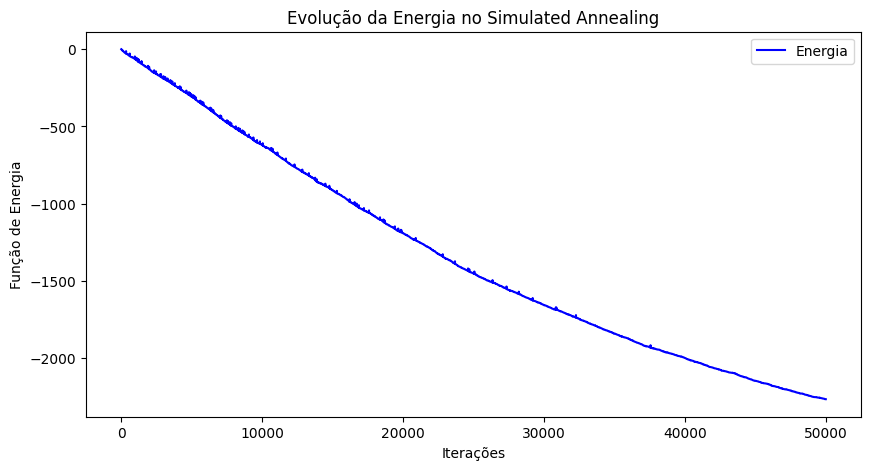

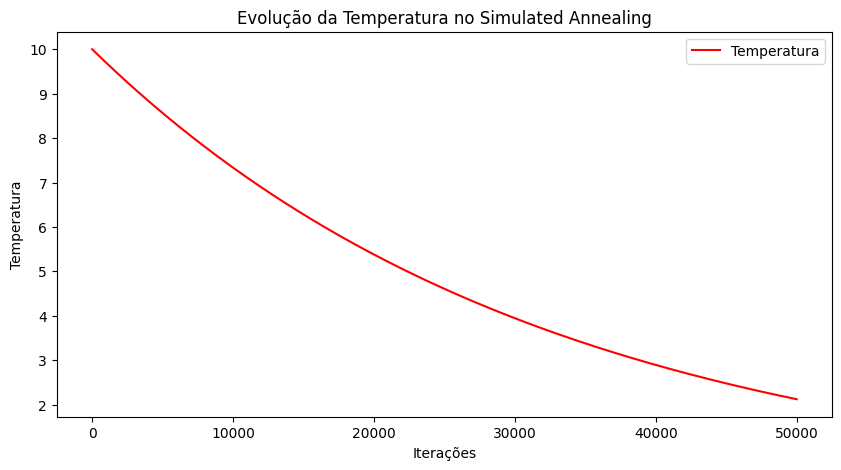

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados salvos
energy_history = np.load("energy_history.npy")
temperature_history = np.load("temperature_history.npy")

# Criar gráfico da evolução da energia
plt.figure(figsize=(10, 5))
plt.plot(energy_history, label="Energia", color='blue')
plt.xlabel("Iterações")
plt.ylabel("Função de Energia")
plt.title("Evolução da Energia no Simulated Annealing")
plt.legend()
plt.show()

# Criar gráfico da evolução da temperatura
plt.figure(figsize=(10, 5))
plt.plot(temperature_history, label="Temperatura", color='red')
plt.xlabel("Iterações")
plt.ylabel("Temperatura")
plt.title("Evolução da Temperatura no Simulated Annealing")
plt.legend()
plt.show()


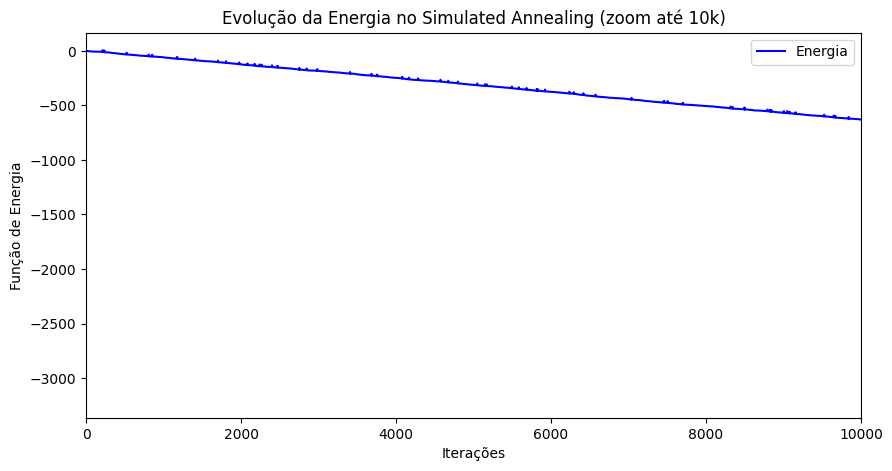

In [95]:
# Zoom nas primeiras 10.000 iterações
plt.figure(figsize=(10, 5))
plt.plot(energy_history, label="Energia", color='blue')
plt.xlabel("Iterações")
plt.ylabel("Função de Energia")
plt.title("Evolução da Energia no Simulated Annealing (zoom até 10k)")
plt.xlim(0, 10000)
plt.legend()
plt.show()

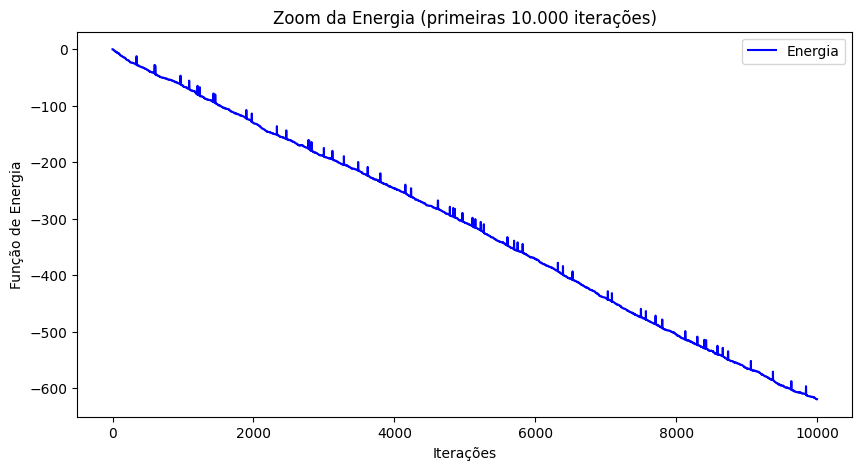

In [127]:
plt.figure(figsize=(10, 5))
plt.plot(range(10000), energy_history[:10000], label="Energia", color='blue')
plt.xlabel("Iterações")
plt.ylabel("Função de Energia")
plt.title("Zoom da Energia (primeiras 10.000 iterações)")
plt.legend()
plt.show()

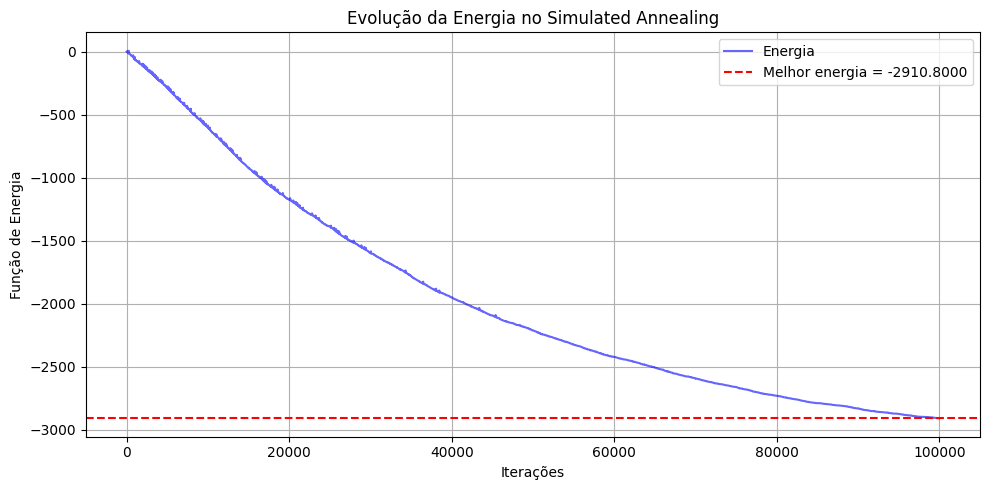

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(energy_history, label="Energia", color="blue", alpha=0.6)
plt.axhline(y=melhor_energia, color='red', linestyle='--', label=f"Melhor energia = {melhor_energia:.4f}")
plt.xlabel("Iterações")
plt.ylabel("Função de Energia")
plt.title("Evolução da Energia no Simulated Annealing")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [80]:
df_suic['Suicidio'].sum()

1100.0

In [81]:
'''df_sim['dif_target'] = df_sim.Suicidio_new - df_sim.Suicidio
df_dif_target_diminuiu = df_sim[df_sim.dif_target < 0]

# Mantém apenas a maior redução por (Id, Feature)
df_dif_target_diminuiu['redu_max'] = df_dif_target_diminuiu.groupby(['Id', 'Feature'])['dif_target'].transform('min')  # min porque é negativo
df_max_red = df_dif_target_diminuiu[['Id', 'Feature', 'redu_max']].drop_duplicates()

# Agrega por feature
reducoes_por_feature = df_max_red['Feature'].value_counts()
impacto_total_por_feature = df_max_red.groupby('Feature')['redu_max'].sum()

# Monta tabela final
df_impacto = pd.DataFrame({
    'Reduções únicas (IDs)': reducoes_por_feature,
    'Total de Ideação Reduzida': impacto_total_por_feature
}).sort_values(by='Total de Ideação Reduzida', ascending=False)
'''

"df_sim['dif_target'] = df_sim.Suicidio_new - df_sim.Suicidio\ndf_dif_target_diminuiu = df_sim[df_sim.dif_target < 0]\n\n# Mantém apenas a maior redução por (Id, Feature)\ndf_dif_target_diminuiu['redu_max'] = df_dif_target_diminuiu.groupby(['Id', 'Feature'])['dif_target'].transform('min')  # min porque é negativo\ndf_max_red = df_dif_target_diminuiu[['Id', 'Feature', 'redu_max']].drop_duplicates()\n\n# Agrega por feature\nreducoes_por_feature = df_max_red['Feature'].value_counts()\nimpacto_total_por_feature = df_max_red.groupby('Feature')['redu_max'].sum()\n\n# Monta tabela final\ndf_impacto = pd.DataFrame({\n    'Reduções únicas (IDs)': reducoes_por_feature,\n    'Total de Ideação Reduzida': impacto_total_por_feature\n}).sort_values(by='Total de Ideação Reduzida', ascending=False)\n"

In [128]:
df_sim['dif_target'] = df_sim.Suicidio_new-df_sim.Suicidio
df_sim['dif_valor'] = df_sim.Valor_new-df_sim.Valor
df_dif_target_aumentou = df_sim.loc[(df_sim.dif_target > 0) & (df_sim.dif_valor < 0)]
df_dif_target_aumentou['valor_max']=df_dif_target_aumentou.groupby(['Id','Feature'])[['Valor_new']].transform('max')
df_val_max_aumentou=df_dif_target_aumentou[["Id", "Feature","valor_max"]].copy().drop_duplicates()
df_dif_target_diminuiu = df_sim.loc[(df_sim.dif_target < 0)]
df_dif_target_diminuiu['valor_max']=df_dif_target_diminuiu.groupby(['Id','Feature'])[['Valor_new']].transform('max')
df_val_max_diminuiu=df_dif_target_diminuiu[["Id", "Feature","valor_max"]].copy().drop_duplicates()
df_dif_target_diminuiu.Id.nunique()

C:\Users\Cristiane\AppData\Local\Temp\ipykernel_4592\2519316872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dif_target_aumentou['valor_max']=df_dif_target_aumentou.groupby(['Id','Feature'])[['Valor_new']].transform('max')
C:\Users\Cristiane\AppData\Local\Temp\ipykernel_4592\2519316872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dif_target_diminuiu['valor_max']=df_dif_target_diminuiu.groupby(['Id','Feature'])[['Valor_new']].transform('max')


655

In [83]:
df_val_max_aumentou.Id.unique()

array([216, 605, 934, 1022, 474, 1105, 914, 203, 151, 769, 22, 710, 753,
       953, 259, 957, 1126, 491, 800, 120, 403, 282, 185, 599, 430, 874,
       604, 902, 1097, 322, 140, 741, 202, 796, 114, 723, 932, 16, 502,
       289, 819, 214, 1154, 722, 439, 238, 761, 586, 742, 88, 465, 601,
       923, 1161, 1113, 1061, 1052, 344, 863, 811, 154, 888, 419, 180,
       952, 265, 423, 328, 852, 624, 23, 891, 909, 499, 1057, 133, 130,
       253, 1034, 629, 685, 213, 305, 304, 672, 227, 438, 978, 269, 551,
       788, 100, 337, 711, 926, 872, 648, 1009, 135, 943, 440, 1076, 706,
       525, 571, 644, 6, 454, 349, 600, 1149, 62, 368, 738, 689, 1037,
       426, 966, 492, 996, 197, 400, 638, 639, 538, 703, 1050, 776, 825,
       859, 657, 621, 1074, 1108, 1006, 857, 248, 1049, 446, 535, 619,
       878, 876, 949, 362, 436, 729, 865, 448, 1043, 1121, 650, 762, 1164,
       537, 881, 138, 868, 674, 220, 849, 724, 900, 159, 602, 1056, 15,
       110, 235, 569, 1132, 840, 176, 518, 860, 789, 58, 9

In [84]:
df_sim.groupby("Id")["Feature"].nunique().describe()

count    742.000000
mean       8.873315
std        0.860038
min        1.000000
25%        9.000000
50%        9.000000
75%        9.000000
max       10.000000
Name: Feature, dtype: float64

In [85]:
df_suic

,Suic_familia,Capaz de tomar decisões importantes,Estudante,Hipocondriase,Sentimentos_culpa,Trabalho e interesses,Dep_familia,Alc_familia,Capaz de desfrutar das coisas,Droga,Suicidio,Ansiedade,Suicidio_error,Ansiedade_error
0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,0.0,2.0,2.0,0.246063,0.042444
1,1.0,2.0,1.0,0.0,3.0,2.0,1.0,1.0,2.0,0.0,2.0,3.0,0.171797,0.142309
2,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.110597,0.168239
3,1.0,1.0,0.0,1.0,2.0,3.0,1.0,1.0,1.0,0.0,1.0,3.0,0.110597,0.831761
4,1.0,2.0,0.0,0.0,0.0,4.0,1.0,1.0,2.0,0.0,0.0,2.0,0.109356,0.044237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,1.0,1.0,0.0,3.0,2.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,0.079219,0.575701
1182,1.0,2.0,0.0,2.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.889403,0.168239
1183,1.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,2.0,0.0,1.0,1.0,0.110597,1.168239
1184,1.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.278864,0.068872


In [129]:
# Diferença entre a predição contrafactual e a original
df_sim['dif_target'] = df_sim['Suicidio_new'] - df_sim['Suicidio']

# Filtra apenas os casos com redução de ideação suicida
df_dif_target_diminuiu = df_sim[df_sim['dif_target'] < 0].copy()

# Para cada (Id, Feature), mantém apenas a MAIOR redução (mais negativa)
df_dif_target_diminuiu['redu_max'] = df_dif_target_diminuiu.groupby(['Id', 'Feature'])['dif_target'].transform('max')

# Remove duplicatas para manter apenas uma redução por (Id, Feature)
df_max_red = df_dif_target_diminuiu[['Id', 'Feature', 'redu_max']].drop_duplicates()

# Conta o número de indivíduos únicos que tiveram redução por feature
reducoes_por_feature = df_max_red['Feature'].value_counts()

# Soma da maior redução por feature (transforma para positivo para exibir como impacto positivo)
impacto_total_por_feature = -df_max_red.groupby('Feature')['redu_max'].sum()

# Cria o DataFrame final
df_impacto = pd.DataFrame({
    'Reduções únicas (IDs)': reducoes_por_feature,
    'Redução Total na Ideação Suicida': impacto_total_por_feature
}).sort_values(by='Redução Total na Ideação Suicida', ascending=False)





In [130]:
df_suic.Estudante.unique()

array([ 1.,  0., -1.])

In [131]:
df_impacto['Redução Média por ID'] = (
    df_impacto['Redução Total na Ideação Suicida'] / df_impacto['Reduções únicas (IDs)']
)


In [132]:
df_impacto[[ 'Reduções únicas (IDs)', 'Redução Total na Ideação Suicida']]

,Reduções únicas (IDs),Redução Total na Ideação Suicida
Trabalho e interesses,616,646.0
Capaz de tomar decisões importantes,587,623.0
Capaz de desfrutar das coisas,582,614.0
Sentimentos_culpa,576,604.0
Hipocondriase,572,598.0
Droga,558,588.0
Estudante,496,543.0
Alc_familia,482,526.0
Dep_familia,472,519.0
Suic_familia,92,112.0


In [133]:
reducoes_por_feature 

Trabalho e interesses                  616
Capaz de tomar decisões importantes    587
Capaz de desfrutar das coisas          582
Sentimentos_culpa                      576
Hipocondriase                          572
Droga                                  558
Estudante                              496
Alc_familia                            482
Dep_familia                            472
Suic_familia                            92
Name: Feature, dtype: int64

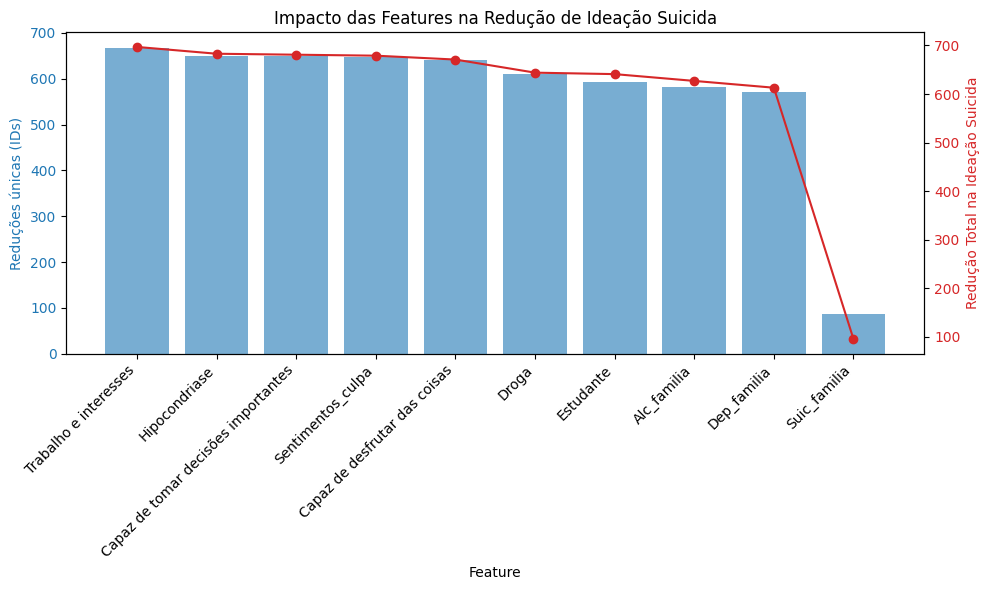

In [121]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Feature')
ax1.set_ylabel('Reduções únicas (IDs)', color=color)
ax1.bar(df_impacto.index, df_impacto['Reduções únicas (IDs)'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Redução Total na Ideação Suicida', color=color)
ax2.plot(df_impacto.index, df_impacto['Redução Total na Ideação Suicida'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Impacto das Features na Redução de Ideação Suicida')
plt.tight_layout()
plt.show()


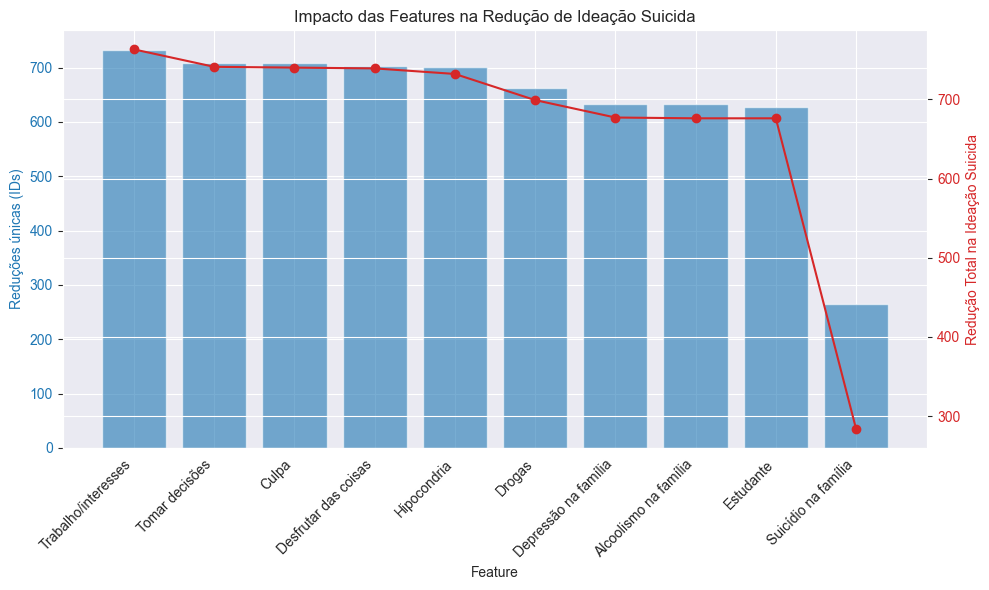

In [512]:
# Novo dicionário com rótulos mais legíveis
custom_labels = {
    'Suic_familia': 'Suicídio na família',
    'Dep_familia': 'Depressão na família',
    'Alc_familia': 'Alcoolismo na família',
    'Estudante': 'Estudante',
    'Droga': 'Drogas',
    'Capaz de tomar decisões importantes': 'Tomar decisões',
    'Sentimentos_culpa': 'Culpa',
    'Hipocondriase': 'Hipocondria',
    'Capaz de desfrutar das coisas': 'Desfrutar das coisas',
    'Trabalho e interesses': 'Trabalho/interesses'
}

# Aplica renomeação aos índices do DataFrame
df_impacto_renomeado = df_impacto.rename(index=custom_labels)

# Reutiliza seu código com os novos labels
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Feature')
ax1.set_ylabel('Reduções únicas (IDs)', color=color)
ax1.bar(df_impacto_renomeado.index, df_impacto_renomeado['Reduções únicas (IDs)'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Redução Total na Ideação Suicida', color=color)
ax2.plot(df_impacto_renomeado.index, df_impacto_renomeado['Redução Total na Ideação Suicida'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Impacto das Features na Redução de Ideação Suicida')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Feature')
ax1.set_ylabel('Reduções', color=color)
ax1.bar(df_impacto.index, df_impacto['Reduções únicas (IDs)'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total de Ideação Reduzida', color=color)
ax2.plot(df_impacto.index, df_impacto['Total de Ideação Reduzida'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Impacto das Features na Redução de Ideação Suicida')
plt.tight_layout()
plt.show()

In [ ]:
#### próximas células usadas para gerar gráfco de mudança individual

In [60]:
reducoes_por_feature = df_dif_target_diminuiu[df_dif_target_diminuiu['valor_max']].groupby('Feature').size().sort_values(ascending=False)


KeyError: "None of [Float64Index([1.0, 1.0, 2.0, 4.0, 3.0, 4.0, 1.0, 5.0, 5.0, 1.0,\n              ...\n              4.0, 3.0, 4.0, 5.0, 2.0, 4.0, 0.0, 4.0, 5.0, 4.0],\n             dtype='float64', length=20962)] are in the [columns]"

In [513]:
df_suic.loc[(df_suic.Suicidio < 1)]

,Unnamed: 0,Suic_familia,Capaz de tomar decisões importantes,Estudante,Hipocondriase,Sentimentos_culpa,Trabalho e interesses,Dep_familia,Alc_familia,Capaz de desfrutar das coisas,Droga,Suicidio,Ansiedade,Suicidio_error,Ansiedade_error,Id
4,4,1.0,2.0,0.0,0.0,0.0,4.0,1.0,1.0,2.0,0.0,0.0,2.0,0.109356,0.044237,2610
9,9,1.0,2.0,0.0,2.0,2.0,3.0,1.0,1.0,3.0,0.0,0.0,3.0,0.098078,0.060315,1270
10,10,1.0,1.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,3.0,0.082578,0.183368,1448
12,12,1.0,1.0,0.0,1.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,2.0,0.108043,0.015425,2755
14,14,1.0,1.0,0.0,2.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,2.0,0.109822,0.060173,1263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,1171,1.0,2.0,0.0,0.0,2.0,3.0,1.0,1.0,3.0,0.0,0.0,3.0,0.093515,0.144187,3479
1172,1172,1.0,1.0,0.0,1.0,3.0,4.0,1.0,1.0,1.0,0.0,0.0,2.0,0.889403,0.168239,697
1174,1174,1.0,1.0,0.0,3.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,3.0,0.094964,0.021526,1586
1178,1178,1.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,2.0,0.089456,0.035487,1037


In [244]:
# Suponha que queremos analisar um ID específico
id_especifico = 1409  # Substitua pelo ID desejado

# Filtrar df_sim para esse ID e obter todas as features alteradas
df_sim_filtrado = df_sim[df_sim['Id'] == id_especifico]

# Verificar as features alteradas (a partir de todas as iterações)
features_alteradas = df_sim_filtrado['Features_Alteradas'].str.split(", ").explode().unique()

if len(features_alteradas) > 0:
    # Filtrar df_1 para esse ID e as features alteradas
    df_features_contrafactuais = df_1[
        (df_1['Id'] == id_especifico) & 
        (df_1['Feature'].isin(features_alteradas))
    ][['Feature', 'Valor', 'Valor_new']]
    
    print(df_features_contrafactuais)
else:
    print(f"Nenhuma feature foi alterada para o ID {id_especifico}.")

                                 Feature  Valor  Valor_new
128                        Hipocondriase    0.0        1.0
135                            Estudante    0.0        1.0
238  Capaz de tomar decisões importantes    1.0        3.0


In [275]:
df_1['dif_target'] = df_1.Suicidio_new-df_1.Suicidio
df_1['dif_valor'] = df_1.Valor_new-df_1.Valor
df_dif_target_diminuiu = df_1.loc[(df_1.dif_target < 0)]
df_dif_target_diminuiu['valor_max']=df_dif_target_diminuiu.groupby(['Id','Feature'])[['Valor_new']].transform('max')
df_val_max_diminuiu=df_dif_target_diminuiu[["Id", "Feature","valor_max"]].copy().drop_duplicates()
df_dif_target_diminuiu.Id.nunique()

C:\Users\Cristiane\AppData\Local\Temp\ipykernel_10172\2186957723.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1716

In [122]:
df_dif_target_aumentou.Id.unique()

array([953, 23, 742, 439, 762, 305, 629, 769, 430, 151, 491, 585, 214,
       213, 926, 644, 857, 1164, 537, 638, 1126, 110, 238, 909, 1059, 525,
       2, 202, 362, 1092, 535, 1161, 538, 602, 753, 531, 1011, 403, 1121,
       932, 923, 973, 368, 492, 454, 998, 722, 739, 509, 672, 639, 438,
       1074, 203, 227, 896, 865, 1134, 180, 1103, 426, 685, 796, 382, 888,
       16, 207, 71, 248, 711, 666, 876, 914, 921, 107, 1105, 793, 499,
       269, 518, 133, 1022, 1053, 522, 569, 1097, 692, 1034, 120, 1183,
       996, 3, 235, 741, 282, 254, 185, 1050, 1113, 717, 259, 859, 1060,
       917, 710, 536, 760, 265, 1056, 878, 819, 600, 1057, 650, 328, 446,
       840, 773, 219, 0, 605, 280, 465, 1061, 216, 949, 239, 541, 662,
       551, 825, 777, 1049, 539, 83, 1054, 440, 783, 915, 848, 603, 1037,
       399, 881, 1098, 724, 943, 688, 1154, 436, 900, 423, 584, 32, 192,
       289, 237, 934, 122, 706, 15, 607, 689, 304, 300, 95, 212, 991, 513,
       502, 367, 571, 349, 46, 78, 100, 140, 24, 1

In [293]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

# Suponha que df_dif_target_diminuiu seja o DataFrame filtrado com diminuição no suicídio
# Filtrar os dados para o ID específico (3573)
df_1['dif_target'] = df_1.Suicidio_new-df_1.Suicidio
df_dif_target_diminuiu = df_1.loc[(df_1.dif_target < 0)]
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

# Suponha que df_dif_target_diminuiu seja o DataFrame filtrado com diminuição no suicídio
# Filtrar os dados para o ID específico (3573)
df_id_d = df_dif_target_diminuiu.loc[df_dif_target_diminuiu['Id'] == 1]

# Selecionar as colunas necessárias
df_id_d['Valor_dif'] = abs(df_id_d['Valor_new']-df_id_d['Valor'])
df_id_d = df_id_d[['Valor_dif', 'Feature']]

# Atualizar o valor máximo
df_id_d['Valor_dif'] = df_id_d['Valor_dif']

# Criar as barras para o gráfico
# Azul (piorou ideação suicida)

# Rosa (melhorou ideação suicida)
melhorou = go.Bar(
    x=df_id_d['Feature'],
    y=df_id_d['Valor_dif'],
    name="Melhorou",
    marker=dict(color='rgb(160, 70, 80)')  # Rosa
)

# Configurar o layout
layout = go.Layout(
    width=500,
    height=600,
    title="Melhorou ideação - ID 1",
    xaxis=dict(title="Features Alteradas"),
    yaxis=dict(title="Delta Valor"),
    barmode='stack',  # Empilhar as barras
    autosize=False
)

# Preparar os dados
data = [melhorou]

# Criar o gráfico
fig1 = go.Figure(data=data, layout=layout)

# Exibir o gráfico
iplot(fig1, filename="size-margins")

C:\Users\Cristiane\AppData\Local\Temp\ipykernel_10172\2994428334.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [296]:
df_dif_target_aumentou

,Id,Feature,Suicidio,Suicidio_new,Valor,Valor_new,dif_target,dif_valor
183,1222,Alc_familia,2.0,3.0,1.0,0.0,1.0,-1.0
262,2909,Dep_familia,2.0,3.0,1.0,0.0,1.0,-1.0
786,3,Alc_familia,3.0,4.0,1.0,0.0,1.0,-1.0
1040,2691,Alc_familia,2.0,3.0,1.0,0.0,1.0,-1.0
1287,978,Hipocondriase,2.0,3.0,1.0,0.0,1.0,-1.0
...,...,...,...,...,...,...,...,...
24938,3308,Trabalho e interesses,2.0,3.0,3.0,1.0,1.0,-2.0
24972,2590,Trabalho e interesses,2.0,3.0,2.0,1.0,1.0,-1.0
25009,294,Alc_familia,2.0,3.0,1.0,0.0,1.0,-1.0
25197,2909,Hipocondriase,2.0,3.0,3.0,1.0,1.0,-2.0


In [301]:
# Suponha que df_dif_target_diminuiu seja o DataFrame filtrado com diminuição no suicídio
# Filtrar os dados para o ID específico (3573)
df_1['dif_target'] = df_1.Suicidio_new-df_1.Suicidio
df_1['dif_valor'] = df_1.Valor_new-df_1.Valor
df_dif_target_aumentou = df_1.loc[(df_1.dif_target > 0) & (df_1.dif_valor < 0)]

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

# Suponha que df_dif_target_diminuiu seja o DataFrame filtrado com diminuição no suicídio
# Filtrar os dados para o ID específico (3573)
df_id_a = df_dif_target_aumentou.loc[df_dif_target_aumentou['Id'] == 2759]

# Selecionar as colunas necessárias
df_id_a['Valor_dif'] = abs(df_id_a['Valor_new']-df_id_a['Valor'])
df_id_a = df_id_a[['Valor_dif', 'Feature']]

# Atualizar o valor máximo
df_id_a['Valor_dif'] = df_id_a['Valor_dif'] 

# Criar as barras para o gráfico
# Azul (piorou ideação suicida)

# Rosa (melhorou ideação suicida)
melhorou = go.Bar(
    x=df_id_a['Feature'],
    y=df_id_a['Valor_dif'],
    name="Piorou",
    marker=dict(color='rgb(34,163,192)')  # Rosa
)

# Configurar o layout
layout = go.Layout(
    width=450,
    height=600,
    title="Piorou ideação - ID 2759",
    xaxis=dict(title="Features Alteradas"),
    yaxis=dict(title="Delta Valor"),
    barmode='stack',  # Empilhar as barras
    autosize=False
)

# Preparar os dados
data = [melhorou]

# Criar o gráfico
fig1 = go.Figure(data=data, layout=layout)

# Exibir o gráfico
iplot(fig1, filename="size-margins")

C:\Users\Cristiane\AppData\Local\Temp\ipykernel_10172\3823448123.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [836]:
df_suic[df_suic.index == 862]

,Suic_familia,Capaz de tomar decisões importantes,Estudante,Hipocondriase,Sentimentos_culpa,Trabalho e interesses,Dep_familia,Alc_familia,Capaz de desfrutar das coisas,Droga,...,Capaz de tomar decisões importantes_original,Estudante_original,Hipocondriase_original,Sentimentos_culpa_original,Trabalho e interesses_original,Dep_familia_original,Alc_familia_original,Capaz de desfrutar das coisas_original,Droga_original,Suic_familia_original
862,1.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0,...,4.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0


In [527]:
df_suic

,Suic_familia,Capaz de tomar decisões importantes,Estudante,Hipocondriase,Sentimentos_culpa,Trabalho e interesses,Dep_familia,Alc_familia,Capaz de desfrutar das coisas,Droga,...,Capaz de tomar decisões importantes_original,Estudante_original,Hipocondriase_original,Sentimentos_culpa_original,Trabalho e interesses_original,Dep_familia_original,Alc_familia_original,Capaz de desfrutar das coisas_original,Droga_original,Suic_familia_original
0,1.0,2.0,0.0,2.0,3.0,2.0,1.0,1.0,2.0,0.0,...,2.0,0.0,2.0,3.0,2.0,1.0,1.0,2.0,0.0,1.0
1,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0
2,1.0,2.0,0.0,0.0,3.0,3.0,1.0,1.0,2.0,0.0,...,2.0,0.0,0.0,3.0,3.0,1.0,1.0,2.0,0.0,1.0
3,1.0,1.0,0.0,3.0,4.0,3.0,1.0,1.0,1.0,0.0,...,1.0,0.0,3.0,4.0,3.0,1.0,1.0,1.0,0.0,1.0
4,1.0,2.0,0.0,1.0,2.0,4.0,1.0,1.0,3.0,0.0,...,2.0,0.0,1.0,2.0,4.0,1.0,1.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,1.0,2.0,0.0,0.0,3.0,2.0,1.0,1.0,2.0,0.0,...,2.0,0.0,0.0,3.0,2.0,1.0,1.0,2.0,0.0,1.0
3949,1.0,1.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,...,1.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0
3950,1.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,1.0,0.0,...,1.0,1.0,2.0,3.0,3.0,1.0,1.0,1.0,0.0,1.0
3951,1.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,...,2.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0


In [607]:
df_sim

,Id,Feature,Suicidio,Suicidio_new,Valor,Valor_new
0,3144,Dep_familia,0.0,1.0,1.0,0.0
1,3527,Estudante,0.0,1.0,0.0,1.0
2,242,Trabalho e interesses,0.0,1.0,1.0,2.0
3,674,Estudante,0.0,1.0,0.0,1.0
4,2075,Trabalho e interesses,2.0,0.0,2.0,1.0
5,1669,Alc_familia,1.0,0.0,1.0,0.0
6,690,Hipocondriase,0.0,1.0,0.0,1.0
7,1710,Droga,1.0,0.0,0.0,1.0
8,3096,Trabalho e interesses,0.0,2.0,2.0,1.0


In [232]:

#2263 1316

AttributeError: 'DataFrame' object has no attribute 'Suicidio_new'

In [153]:
df_sim_bom = df_sim.copy()

In [173]:
df_sim_bom

,Id,Feature,Suicidio,Suicidio_new,Valor,Valor_new,dif_target,dif_valor
0,1449,Alc_familia,2.0,1.0,1.0,0.0,-1.0,-1.0
1,1456,Capaz de desfrutar das coisas,3.0,0.0,1.0,4.0,-3.0,3.0
2,3398,Sentimentos_culpa,2.0,1.0,1.0,2.0,-1.0,1.0
3,137,Suic_familia,2.0,1.0,1.0,0.0,-1.0,-1.0
4,580,Capaz de desfrutar das coisas,2.0,1.0,1.0,3.0,-1.0,2.0
...,...,...,...,...,...,...,...,...
73800,3532,Trabalho e interesses,2.0,1.0,3.0,1.0,-1.0,-2.0
73801,3267,Trabalho e interesses,2.0,3.0,2.0,1.0,1.0,-1.0
73802,1882,Capaz de tomar decisões importantes,2.0,1.0,1.0,1.0,-1.0,0.0
73803,3579,Capaz de desfrutar das coisas,2.0,1.0,1.0,4.0,-1.0,3.0


In [30]:
df_dif_target_diminuiu.Feature.value_counts()

Capaz de tomar decisões importantes    9770
Capaz de desfrutar das coisas          9735
Hipocondriase                          9712
Sentimentos_culpa                      9187
Trabalho e interesses                  8454
Droga                                  6090
Dep_familia                            4203
Estudante                              4169
Alc_familia                            4150
Suic_familia                           2164
Name: Feature, dtype: int64

In [31]:
df_dif_target_diminuiu.Feature.value_counts()

Capaz de tomar decisões importantes    9770
Capaz de desfrutar das coisas          9735
Hipocondriase                          9712
Sentimentos_culpa                      9187
Trabalho e interesses                  8454
Droga                                  6090
Dep_familia                            4203
Estudante                              4169
Alc_familia                            4150
Suic_familia                           2164
Name: Feature, dtype: int64

In [153]:
df_dif_target_diminuiu.Feature.value_counts()

Trabalho e interesses                  2071
Sentimentos_culpa                      1109
Capaz de tomar decisões importantes     972
Capaz de desfrutar das coisas           902
Hipocondriase                           863
Droga                                   846
Estudante                               649
Dep_familia                             640
Alc_familia                             544
Name: Feature, dtype: int64

In [154]:
t = df_dif_target_diminuiu.loc[df_dif_target_diminuiu.Feature =='Suic_familia']

In [155]:
t

,Id,Feature,Suicidio,Suicidio_new,Valor,Valor_new,dif_target,dif_valor,valor_max


In [156]:
k=pd.merge(df_dif_target_diminuiu,t, how="inner", on=["Id"])

In [157]:
k

,Id,Feature_x,Suicidio_x,Suicidio_new_x,Valor_x,Valor_new_x,dif_target_x,dif_valor_x,valor_max_x,Feature_y,Suicidio_y,Suicidio_new_y,Valor_y,Valor_new_y,dif_target_y,dif_valor_y,valor_max_y


In [156]:
df_dif_target_aumentou = df_sim.loc[(df_sim.dif_target > 0) & (df_sim.dif_valor < 0)]
df_dif_target_aumentou['valor_max']=df_dif_target_aumentou.groupby(['Id','Feature'])[['Valor_new']].transform('max')
df_val_max_aumentou=df_dif_target_aumentou[["Id", "Feature","valor_max"]].copy().drop_duplicates()

C:\Users\Cristiane\AppData\Local\Temp\ipykernel_10172\2501236533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dif_target_aumentou['valor_max']=df_dif_target_aumentou.groupby(['Id','Feature'])[['Valor_new']].transform('max')


In [155]:
df_dif_target_aumentou.Id.value_counts()

3573    12
890     11
1281    11
2909     9
3881     9
        ..
3010     1
225      1
2754     1
2254     1
3267     1
Name: Id, Length: 315, dtype: int64

In [157]:
df_val_max_aumentou.Feature.value_counts()

Trabalho e interesses                  184
Alc_familia                            104
Sentimentos_culpa                       70
Hipocondriase                           66
Dep_familia                             56
Capaz de desfrutar das coisas           50
Suic_familia                            39
Capaz de tomar decisões importantes     38
Droga                                    5
Estudante                                3
Name: Feature, dtype: int64

In [158]:
df_dif_target_diminuiu.Feature.value_counts()

Capaz de tomar decisões importantes    10208
Capaz de desfrutar das coisas          10195
Hipocondriase                          10149
Sentimentos_culpa                       9593
Trabalho e interesses                   8733
Droga                                   6266
Dep_familia                             4314
Estudante                               4286
Alc_familia                             4267
Suic_familia                            2633
Name: Feature, dtype: int64

In [161]:
df_dif_target_diminuiu.Feature.value_counts()

Trabalho e interesses                  2071
Sentimentos_culpa                      1109
Capaz de tomar decisões importantes     972
Capaz de desfrutar das coisas           902
Hipocondriase                           863
Droga                                   846
Estudante                               649
Dep_familia                             640
Alc_familia                             544
Name: Feature, dtype: int64

In [38]:
df_dif_target_aumentou.Id.nunique() #2196  1542

304

In [369]:
df_sim.to_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\df_sim_SN_20_06_V2.csv', sep=',')
#df_nao.to_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\df_nao_SN_09_02.csv', sep=',')
#df_sim =pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\df_sim_SN_06_06_v2.csv', sep=',')

In [ ]:
df_sim.Id.value_counts()

In [ ]:
df_sim.dif_target.value_counts()

In [ ]:
df_dif_target_aumentou.Id.nunique()

In [ ]:
df_dif_target_aumentou = df_sim.loc[(df_sim.dif_target > 0) & (df_sim.dif_valor < 0)]
df_dif_target_aumentou['valor_max']=df_dif_target_aumentou.groupby(['Id','Feature'])[['Valor_new']].transform('max')
df_val_max_aumentou=df_dif_target_aumentou[["Id", "Feature","valor_max"]].copy().drop_duplicates()

In [ ]:
df_sim.Suicidio.value_counts()

In [ ]:
#df_sim.to_csv('cf_models/df_sim_pd_23_09.csv', sep=',')
#df_nao.to_csv('cf_models/df_nao_pd_23_09.csv', sep=',')

In [ ]:
#total de ID's que foram sensibilizados
pd.unique(df_sim['Id'])

In [ ]:
#total de ID's que não foram sensibilizados
pd.unique(df_nao['Id'])

In [ ]:
df_nao=df_nao.drop_duplicates()
df_sim=df_sim.drop_duplicates()
df_sim.Id.value_counts()

In [ ]:
#cálculo da diferença (absoluta) emtre valor real e valor simulado
df_sim['dif'] = abs(df_sim['Valor'] - df_sim['Valor_new'])
df_nao['dif'] = abs(df_nao['Valor'] - df_nao['Valor_new'])